# Introducción

En esta tarea, se realizará un exhaustivo análisis exploratorio para comprender la estructura de los datos sobre los pacientes con cirrosis y la relación entre las variables relevantes. A continuación, se aplicarán técnicas de ingeniería de atributos para optimizar la calidad de los datos, descartando aquellas variables que no contribuyan significativamente a la construcción de modelos.

Posteriormente, se contruirán modelos de clasificación utilizando Decision Trees, Máquinas de Soporte Vectorial (SVM), K-Vecinos más Cercanos (KNN) y dos métodos ensamblados seleccionados por su eficacia probada en problemas de clasificación complejos. Cada modelo será ajustado cuidadosamente mediante la optimización de hiperparámetros para garantizar su rendimiento óptimo.

Luego, se evaluará y compararán los modelos utilizando métricas estándar como precisión, recall, la matriz de confusión y el área bajo la curva ROC, proporcionando así una recomendación fundamentada sobre cuál modelo ofrece la mejor capacidad predictiva para determinar el estado de la cirrosis en los individuos afectados.

Finalmente, se ecxplorará la segmentación de los individuos afectados por cirrosis mediante técnicas de clustering particional, jerárquico y basado en densidad, utilizando métricas como el Silhouette Score para evaluar la calidad de los clusters obtenidos.

In [ ]:
# Introducciónimport pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
!pip install scipy
import scipy.stats as stats

In [ ]:
from google.colab import files
uploades = files.upload()
df = pd.read_csv("2024061002481050244E7A632E38__cirrhosis_stage.csv", encoding = "latin-1") #54035 datos
df

Saving 2024061002481050244E7A632E38__cirrhosis_stage.csv to 2024061002481050244E7A632E38__cirrhosis_stage (3).csv


N_Days Status             Drug    Age Sex        Country Ascites  \
0        2221      C          Placebo  18499   F       Malaysia       N   
1        1230      C          Placebo  19724   M  United States       Y   
2        4184      C          Placebo  11839   F         Sweden       N   
3        2090      D          Placebo  16467   F        Iceland       N   
4        2105      D          Placebo  53728   F         Turkey       N   
...       ...    ...              ...    ...  ..            ...     ...   
24995    3584      D  D-penicillamine  53728   F          China       N   
24996    3584      D  D-penicillamine  23612   F         Mexico       N   
24997     971      D  D-penicillamine  16736   F        Nigeria       N   
24998    3707      C  D-penicillamine  16990   F         Norway       N   
24999    3707      C  D-penicillamine  16990   F       Portugal       N   

      Hepatomegaly Spiders Edema  ...  Cholesterol  Albumin  Sodium  Copper  \
0                Y       N     N  ...   149.000000     4.04     NaN   227.0   
1                N       Y     N  ...   219.000000     3.93   136.0    22.0   
2                N       N     N  ...   320.000000     3.54   138.0    51.0   
3                N       N     N  ...   255.000000     3.74     NaN    23.0   
4                Y       N     N  ...    -1.000000     3.54     NaN    74.0   
...            ...     ...   ...  ...          ...      ...     ...     ...   
24995            N       N     N  ...   231.000000     3.87   144.0   173.0   
24996            N       N     N  ...   231.000000     3.87     NaN   173.0   
24997            Y       Y     Y  ...   369.510563     3.23     NaN    18.0   
24998            Y       N     N  ...   315.000000     4.24     NaN    13.0   
24999            Y       N     N  ...   315.000000     4.24   138.0    13.0   

       Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0         598.0   52.70      57.000000      256.0          9.9      1  
1         663.0   45.00      75.000000      220.0         10.8      2  
2        1243.0  122.45      80.000000      225.0         10.0      2  
3        1024.0   77.50      58.000000      151.0         10.2      2  
4        1052.0  108.50     109.000000      151.0         11.5      1  
...         ...     ...            ...        ...          ...    ...  
24995    9009.8  127.71      96.000000      295.0         11.0      2  
24996    9009.8  127.71      96.000000      295.0         11.0      2  
24997     790.0  179.80     124.702128      104.0         13.0      3  
24998    1637.0  170.50      70.000000      426.0         10.9      2  
24999    1637.0  170.50      70.000000      426.0         10.9      2  

[25000 rows x 21 columns]

La base de datos inicial contiene 25.000 resgistros y  21 atributos. Los datos se presentan de la siguiente manera:


*   Categóricos:

Los siguientes atributos representan datos categóricos: Status, Drug, Sex, Country, Ascites, Hepatomegaly, Spiders y Edema. Cabe destacar que todas estas variables son presentadas como categóricas nominales ya que no presentan un orden nominal.
*   Numéricas:

Los siguientes atributos representan datos numéricos: N_days, Age, Bilirubin, Cholesterol, Albumin, Sodium, Copper, Alh_Phos, SGOT, Tryglicerides, Platelets, Prothrombin y Stage. Todos son presentados, a excepción de Stage, como numéricos continuos.

Stage, es presentada como una variable numérica ordinal, ya que sólo puede tomar 3 valores según el estado en que se encuentre la enfermedad, por lo que representan diferentes etapas de severidad o progresión de la enfermedad. Aunque los valores son numéricos, su principal característica es el orden jerárquico, no la magnitud.

In [ ]:
na_counts = df.isna().sum()

# Imprimir los conteos de NaN
print("Conteo de valores NaN por columna:")
print(na_counts)

Conteo de valores NaN por columna:
N_Days              0
Status              0
Drug                0
Age                 0
Sex                 0
Country             0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Sodium           9400
Copper              5
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64


A continuación, se limpiará la base de datos, seleccionando las columnas numéricas a las cuales, además, se les cambiará el nombre para trabajarlas de mejor manera.

Posteriormente se separarán los datos numéricos de los categóricos ya que las técnicas de imputación se aplican de manera diferente a cada tipo de dato.

Luego, para manejar los datos faltantes, se aplicará la imputación de valores nulos utilizando KNNImputer. Y finalmente, se combinarán nuevamente las variables categóricas originales con los datos numéricos imputados en un nuevo Data Frame.

In [ ]:
data = df[['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Stage', 'Platelets', 'Tryglicerides', 'N_Days', 'Copper', 'Sodium', 'Cholesterol']]

data.rename(columns={
    'Age': 'Edad',
    'Bilirubin': 'Bilirrubina',
    'Alk_Phos': 'Fosfatasa Alcalina',
    'SGOT': 'SGOT',
    'Albumin': 'Albúmina',
    'Prothrombin': 'Protime',
    'Stage': 'Etapa',
    'Cholesterol': 'Colesterol',
    'Tryglicerides': 'Trigliceridos',
    'N_Days': 'Dias',
    'Platelets': 'Plaquetas',
    'Copper': 'Cobre',
    'Sodium': 'Sodio',
}, inplace=True)

# Separate numerical and categorical features
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

# Imputación de valores nulos utilizando KNNImputer on numerical features only
knn_imp = KNNImputer(n_neighbors=5)
data_imputed_numerical = pd.DataFrame(knn_imp.fit_transform(numerical_data), columns=numerical_data.columns)

# Combine imputed numerical data with original categorical data
data_final = pd.concat([data_imputed_numerical, categorical_data.reset_index(drop=True)], axis=1)

# Mostrar información final del dataframe
print("Información final del dataframe después de la imputación:")
print(data_final.info())
print("Primeras filas del dataframe final:")
print(data_final.head())

<ipython-input-13-e55071efa525>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


Información final del dataframe después de la imputación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                25000 non-null  float64
 1   Bilirrubina         25000 non-null  float64
 2   Fosfatasa Alcalina  25000 non-null  float64
 3   SGOT                25000 non-null  float64
 4   Albúmina            25000 non-null  float64
 5   Protime             25000 non-null  float64
 6   Etapa               25000 non-null  float64
 7   Plaquetas           25000 non-null  float64
 8   Trigliceridos       25000 non-null  float64
 9   Dias                25000 non-null  float64
 10  Cobre               25000 non-null  float64
 11  Sodio               25000 non-null  float64
 12  Colesterol          25000 non-null  float64
dtypes: float64(13)
memory usage: 2.5 MB
None
Primeras filas del dataframe final:
      Edad  Bili

In [ ]:
na_counts = data_final.isna().sum()

# Imprimir los conteos de NaN
print("Conteo de valores NaN por columna:")
print(na_counts)

Conteo de valores NaN por columna:
Edad                  0
Bilirrubina           0
Fosfatasa Alcalina    0
SGOT                  0
Albúmina              0
Protime               0
Etapa                 0
Plaquetas             0
Trigliceridos         0
Dias                  0
Cobre                 0
Sodio                 0
Colesterol            0
dtype: int64


##EDA

En esta sección, se llevará a cabo el Análisis Exploratorio de los Datos, con el objetivo de comprender las características, patrones y tendencias presentes en el conjunto de datos con el que se está trabajando. Para ello como primer paso, se realizará una descripción estadística de los datos para comprender mejor la distribución y los rangos de valores de las variables. De esta manera se prepararán los datos de una mejor manera para los análisis estadísticos que se realizarán posteriormente.

In [ ]:

data_sinlabels = data_final[['Edad', 'Bilirrubina', 'Fosfatasa Alcalina', 'SGOT', 'Albúmina','Protime', 'Plaquetas', 'Trigliceridos', 'Dias', 'Cobre', 'Sodio', 'Colesterol']]

# Obtenemos una descripción general del dataset sin los labels
description = data_sinlabels.describe()
print(description)


               Edad   Bilirrubina  Fosfatasa Alcalina          SGOT  \
count  25000.000000  25000.000000        25000.000000  25000.000000   
mean   19198.856360      3.402644         1995.675597    123.166345   
std     6166.680358      4.707491         1798.885660     47.747616   
min     9598.000000      0.300000          289.000000     26.350000   
25%    15712.000000      0.800000         1032.000000     92.000000   
50%    18701.000000      1.300000         1828.000000    122.556346   
75%    21483.000000      3.400000         1982.655769    134.850000   
max    53728.000000     28.000000        13862.400000    457.250000   

           Albúmina       Protime     Plaquetas  Trigliceridos          Dias  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean       3.486578     10.734549    256.007337     140.363539   1887.117040   
std        0.380488      0.904436     98.679006     244.843053   1091.690918   
min        1.960000      9.000000     62

A continuación, se analizará cada uno de estos índices por separado, comenzando por la media, mediana y moda.

In [ ]:
numerical_data = data_sinlabels.select_dtypes(include=[np.number])
means = numerical_data.mean()
print(means)

Edad                  19198.856360
Bilirrubina               3.402644
Fosfatasa Alcalina     1995.675597
SGOT                    123.166345
Albúmina                  3.486578
Protime                  10.734549
Plaquetas               256.007337
Trigliceridos           140.363539
Dias                   1887.117040
Cobre                   100.184663
Sodio                   139.985152
Colesterol              331.779432
dtype: float64


In [ ]:
# Mediana
data_sinlabels.select_dtypes(include=[np.number]).median()


Edad                  18701.000000
Bilirrubina               1.300000
Fosfatasa Alcalina     1828.000000
SGOT                    122.556346
Albúmina                  3.510000
Protime                  10.600000
Plaquetas               251.000000
Trigliceridos           124.702128
Dias                   1680.000000
Cobre                    97.648387
Sodio                   140.000000
Colesterol              361.000000
dtype: float64

In [ ]:
# Moda
data_final.mode()

Edad  Bilirrubina  Fosfatasa Alcalina        SGOT  Albúmina  Protime  \
0  53728.0          0.7         1982.655769  122.556346      3.35     10.6   

   Etapa  Plaquetas  Trigliceridos    Dias      Cobre  Sodio  Colesterol  
0    2.0  257.02457     124.702128  1170.0  97.648387  140.0  369.510563

Con respecto a los resultados obtenidos de las distintas variables:

Cuando la media, la mediana y la moda coinciden o presentan valores cercanos, se puede inferir que la distribución de las variables es simétrica, esto quiero decir que la distribución de los datos se distribuye de manera equilibrada alrededor del valor Cetral. Las variables que presentan este comportamiento son: Edad, Albumina, Sodio, Cobre, SGOT y Protrombina.

En cambio, cuando la media y la mediana son mayores que la moda, se sugiere que la distribución de la variable está sesgada a la derecha, lo que significa que la mayoría de los datos se concentran en la parte izquierda de la distribución. Las variables que presentan este tipo de asimetría son:  N_Dias, Bilirrubina, Colesterol, Triglicéridos y Plaquetas

Sin embargo, con esta primera vista no se puede afirmar aún la distribución que siguen estas variables, pues debe ser realizado en conjunto con los análisis de distribución y la presencia de valores atípicos que podrían estar sesgando las métricas presentadas.

## Medidas de dispersión

A continuación se analizarán el rango, los cuártiles, la varianza y la desviación estándar de las variables

Con respecto al Rango, se observa que las variables N_Dias, Edad, Colesterol, Cobre, Fosfata, SGOT, Triglicéridos y Plaquetas presentan un amplio rango, lo que indica una gran variabilidad en los datos, sin embargo este parámetro podría estar sesgado debido a la presencia de Outliers en dichas variables.

En cuanto a Bilirrubina, Albumina, Sodio y Protombina, estas presentan una variabilidad moderada, lo que sugiere que no existiría una gran variabilidad en los datos.


In [ ]:
# Rango
data_range = data_sinlabels.select_dtypes(include=[np.number]).max() - data_sinlabels.select_dtypes(include=[np.number]).min()
data_range

Edad                  44130.00
Bilirrubina              27.70
Fosfatasa Alcalina    13573.40
SGOT                    430.90
Albúmina                  2.68
Protime                   9.00
Plaquetas               659.00
Trigliceridos          3996.00
Dias                   4754.00
Cobre                   584.00
Sodio                    10.00
Colesterol             1776.00
dtype: float64

Por otra parte, al analizar el IQR que es El IQR el 50% central de los datos, indicando la amplitud de la dispersión sin verse afectado por outliers. Se puede observar de los resultados que en general se presenta un IQR alto en la mayoría de las variables, a excepción de Bilirrubina, Albumina, Sodio y Protombina. Esto indica que la mayoría de los datos están dispersos en un intervalo amplio.

In [ ]:
# Cuartiles
quartiles =data_sinlabels.select_dtypes(include=[np.number]).quantile([0.25, 0.5, 0.75])
quartiles

Edad  Bilirrubina  Fosfatasa Alcalina        SGOT  Albúmina  Protime  \
0.25  15712.0          0.8         1032.000000   92.000000      3.29     10.0   
0.50  18701.0          1.3         1828.000000  122.556346      3.51     10.6   
0.75  21483.0          3.4         1982.655769  134.850000      3.75     11.1   

      Plaquetas  Trigliceridos    Dias       Cobre  Sodio  Colesterol  
0.25      189.0      92.000000  1080.0   52.000000  138.0  248.000000  
0.50      251.0     124.702128  1680.0   97.648387  140.0  361.000000  
0.75      311.0     128.000000  2576.0  107.000000  142.0  369.510563

In [ ]:
quartiles.loc['IQR'] = quartiles.loc[0.75] - quartiles.loc[0.25]
quartiles

Edad  Bilirrubina  Fosfatasa Alcalina        SGOT  Albúmina  Protime  \
0.25  15712.0          0.8         1032.000000   92.000000      3.29     10.0   
0.5   18701.0          1.3         1828.000000  122.556346      3.51     10.6   
0.75  21483.0          3.4         1982.655769  134.850000      3.75     11.1   
IQR    5771.0          2.6          950.655769   42.850000      0.46      1.1   

      Plaquetas  Trigliceridos    Dias       Cobre  Sodio  Colesterol  
0.25      189.0      92.000000  1080.0   52.000000  138.0  248.000000  
0.5       251.0     124.702128  1680.0   97.648387  140.0  361.000000  
0.75      311.0     128.000000  2576.0  107.000000  142.0  369.510563  
IQR       122.0      36.000000  1496.0   55.000000    4.0  121.510563

Con respecto a la varianza:


*   N_Dias, Edad, Colesterol Fosfata Alcalina y Triglicéridos presentan una varianza extremadamente alta, lo que indica que en estas variables existe una gran dispersión de datos alrededor de la media.
*   Cobre, SGOT y Plaquetas presentan una varianza moderada, lo que indica que los están están dispersos alrededor de la media y mediana.
* Bilirrubina y Sodio presentan varianza relativamente baja, lo que indica que los datos están agrupados alrededor de la mediana.
* Albumina y Protrombina presentan una varianza baja, por lo que los datos se encuentran muy agrupados alrededor de la media y mediana.

In [ ]:
# Varianza
data_sinlabels.select_dtypes(include=[np.number]).var()

Edad                  3.802795e+07
Bilirrubina           2.216047e+01
Fosfatasa Alcalina    3.235990e+06
SGOT                  2.279835e+03
Albúmina              1.447714e-01
Protime               8.180042e-01
Plaquetas             9.737546e+03
Trigliceridos         5.994812e+04
Dias                  1.191789e+06
Cobre                 5.356021e+03
Sodio                 7.003445e+00
Colesterol            4.767819e+04
dtype: float64

Por último, la desviación estándar indica tambine qué tan dispersos están los datos. Y de los resultados se puede indicar lo siguiente:


*   N_Dias, Edad, Colesterol, Fosfata Alcalina y Triglicéridos presentan una gran desviación estándar, lo que confirma la amplitud de la distribución de los datos.
* Cobre, SGOT y Plaquetas presentan una desviación estándar moderada, lo que confirma una dispersión (menor que con respecto al grupo anterior) alderededor de la media y la mediana.
*   Bilirrubina, Albumina, Sodio y Protombina presentan desviación estándar relativamente baja, lo que confirma esta agrupación alrededor de la media.

In [ ]:
# Desviación Estándar
data_sinlabels.select_dtypes(include=[np.number]).std()

Edad                  6166.680358
Bilirrubina              4.707491
Fosfatasa Alcalina    1798.885660
SGOT                    47.747616
Albúmina                 0.380488
Protime                  0.904436
Plaquetas               98.679006
Trigliceridos          244.843053
Dias                  1091.690918
Cobre                   73.184840
Sodio                    2.646402
Colesterol             218.353362
dtype: float64

## Gráficos descriptivos

Continuando con el análisis descriptivo de los datos, en esta sección se presentarán gráficos descriptivos que permitirán, a través de representaciones visuales, comprender mejor la distribución de las variables. Se comenzará con box plots, los cuales ofrecen una visión clara de la dispersión y los outliers de cada variable, facilitando la identificación de patrones y anomalías en el conjunto de datos.

## Boxplot
A continuación se detallan los resultados obtenidos por cada variable:

1.   **Distribución de Edad por Etapa:**
En las tres etapas, los diagramas de caja muestran una distribución relativamente simétrica con la mediana cerca del centro, indicando un equilibrio en los datos. Los bigotes son de longitud moderada, sugiriendo una dispersión balanceada. Aunque la Etapa 2 presenta bigotes ligeramente más cortos, señalando una menor dispersión en comparación con la Etapa 1, y la Etapa 3 muestra una distribución algo más amplia, todas las etapas presentan valores atípicos significativos.

2.   **Distribución de Bilirrubina por Etapa:**
En las tres etapas, los niveles de bilirrubina muestran distintas características. En la Etapa 1, los niveles son bajos con una mediana baja y un rango intercuartil (IQR) estrecho, aunque con valores atípicos elevados. En la Etapa 2, los niveles de bilirrubina mantienen una mediana baja similar, pero con una variabilidad ligeramente mayor y menos valores atípicos. En la Etapa 3, se observa un aumento notable en la mediana de bilirrubina y una mayor variabilidad, con un IQR más amplio y numerosos valores atípicos, indicando una progresión de la enfermedad.

3. **Distribución de Fosfata Alcalina por Etapa**
En las tres etapas (1, 2 y 3), los niveles de fosfatasa alcalina son relativamente similares, con medianas y rangos intercuartílicos (IQR) que no varían significativamente entre las etapas. Esto sugiere que los niveles de fosfatasa alcalina no son un buen indicador del progreso de la cirrosis, ya que no muestran una tendencia clara de aumento o disminución con el avance de la enfermedad. Se observa una considerable cantidad de valores atípicos en cada etapa, pero estos valores no se correlacionan claramente con la progresión de la cirrosis.

4. **Distribución de SGOT por Etapa**
El diagrama de cajas muestra que los niveles de SGOT aumentan a medida que avanza la etapa. Este aumento sugiere que el daño hepático es más grave en las etapas posteriores de la enfermedad. Además hay presencia de outliers en las tres etapas, específicamente en valores más altos.

5. **Distribución de Albumina por Etapa**
Los niveles de albúmina en las tres etapas se distribuyen principalmente entre 3.0 y 4.0. Aunque hay algunos valores atípicos hacia abajo, en general, los valores están más agrupados y muestran una distribución más normal. La mediana y los rangos intercuartílicos parecen consistentes a través de las etapas.

6. **Distribución de Protime por Etapa** Las medianas se encuentran casi en el centro en las tres etapas. Entre 1 y 2 no hay tantan diferencia entre el rango que alcanza este índice, sin embargo, cuando está en la etapa tres, sí se pega un salto, por lo que aquí se nota un aumento de Protime en esta etapa de la enfermedad. Además se hacen presentes outliers en todas las etapas.

7. **Distribución de Plaquetas por Etapa**
Las plaquetas van disminuyendo a medida que avanza la edad. Las medianas se encuentran centradas y hay presencia de outliers en todas. El rango intercuartil es similar en 1 y 2, pero en 3 aumenta, por lo que en esta etapa los datos se encuentran más dispersos.

8. **Distribución de Triglicéridos por Etapa**
Cada etapa parece tener un amplio rango de valores, con numerosos valores atípicos, particularmente en el rango más alto (alrededor de 3000-4000). Sin embargo, la mayoría de los valores parecen agruparse por debajo de 500.

9.   **Distribución de N_Dias por Etapa:**
En las tres etapas, la distribución de N_Dias muestra algunas variaciones. En la Etapa 1, la caja es relativamente simétrica con la mediana cerca del centro y sin valores atípicos, y los bigotes son de longitud moderada, indicando una dispersión equilibrada. En la Etapa 2, la distribución es ligeramente más dispersa con algunos valores atípicos por encima del bigote superior, aunque la mediana sigue centrada, sugiriendo una distribución simétrica. En la Etapa 3, la caja muestra una distribución más compacta con varios valores atípicos por encima del bigote superior, la mediana está centrada y la dispersión es moderada, indicando una variabilidad en los datos. Esto muestra que la distribución de N_Dias varía ligeramente entre las etapas.

10.   **Distribución de Cobre por Etapa:** Podemos ver que la mediana en 1 y 2 no está centrada, por lo que la distribución de datos no es tan simétrica en estas dos etapas, en cambio en 3, sí se encuentra más centrada. El IQR es parecido en los tres, por lo que la variabilidad de los datos es parecida. Además existe presencia de outliers en los tres casos.


11.   **Distribución de Sodio por Etapa:**
En las tres etapas, los diagramas de caja muestras una distribución relativamente simétrica, con la mediana en el centro, indicando un equilibrio en los datos. Los bigotes son de longitud moderada, sugiriendo una dispersión balanceada. Además no hay presencia de outliers.








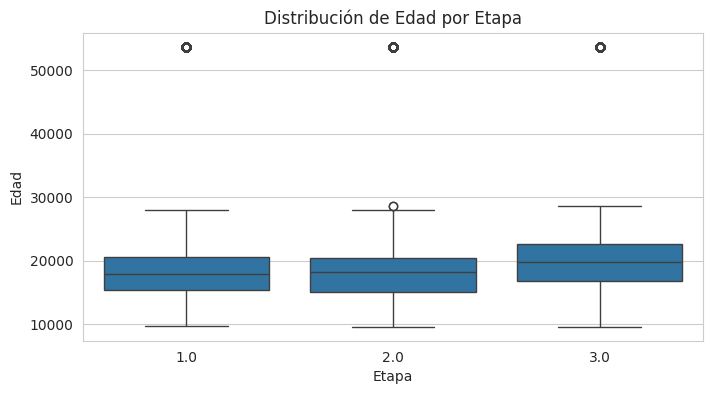

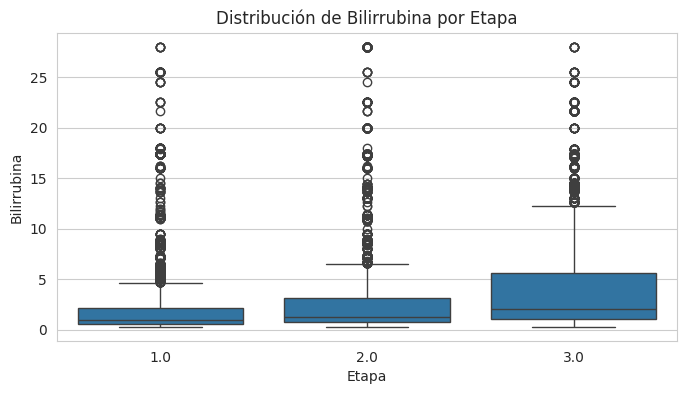

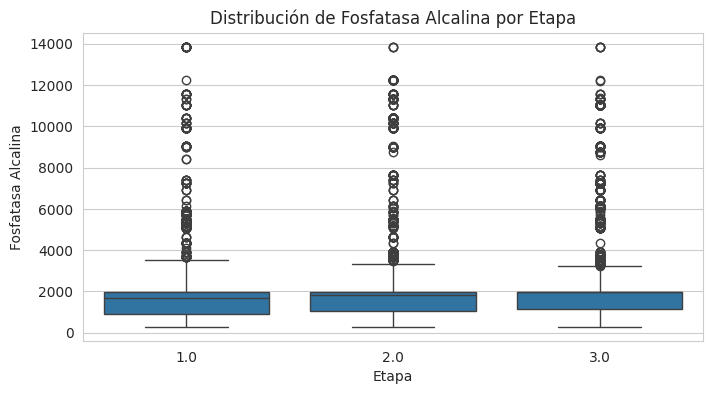

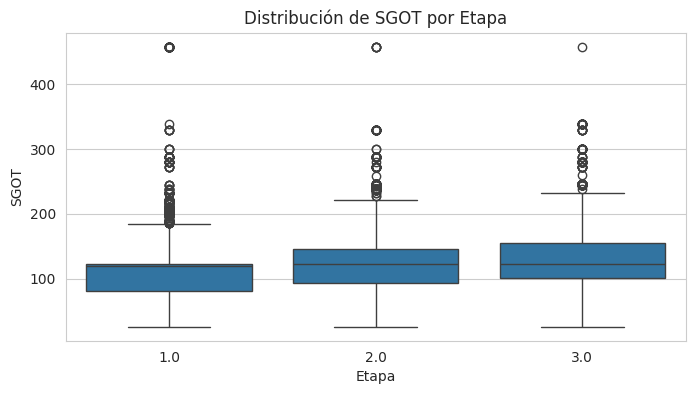

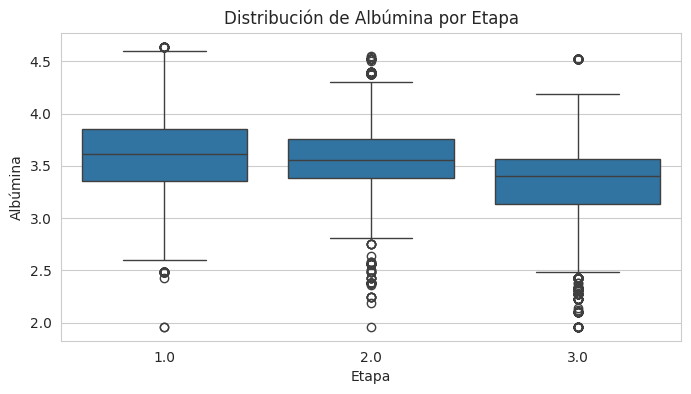

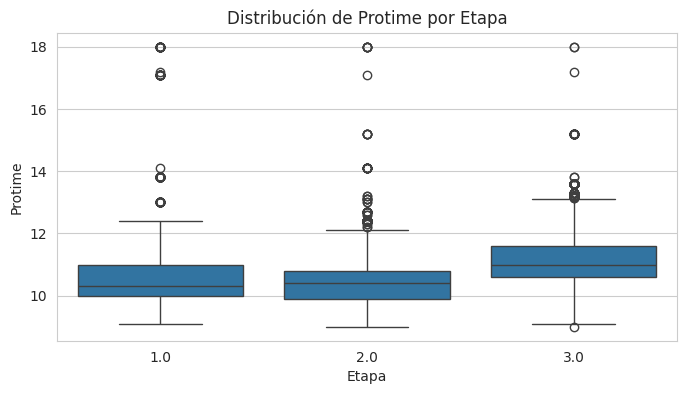

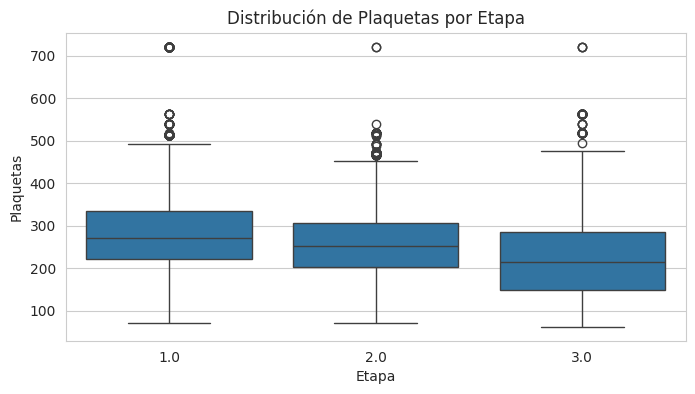

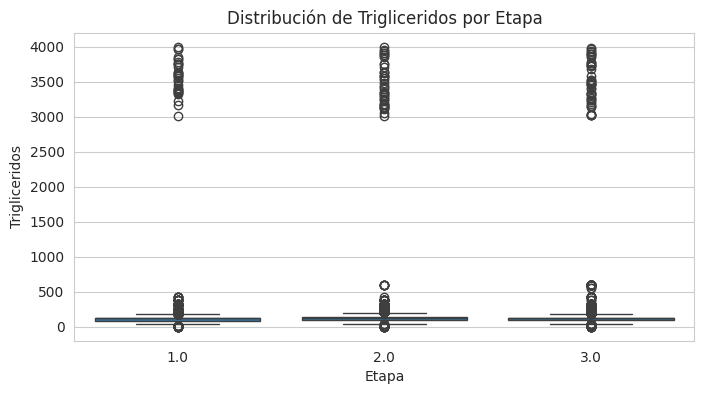

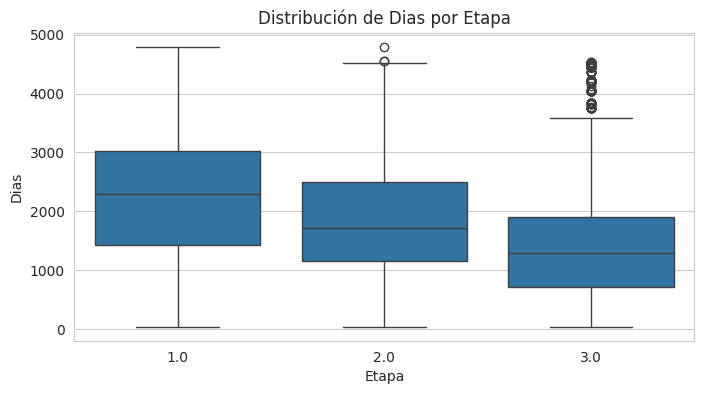

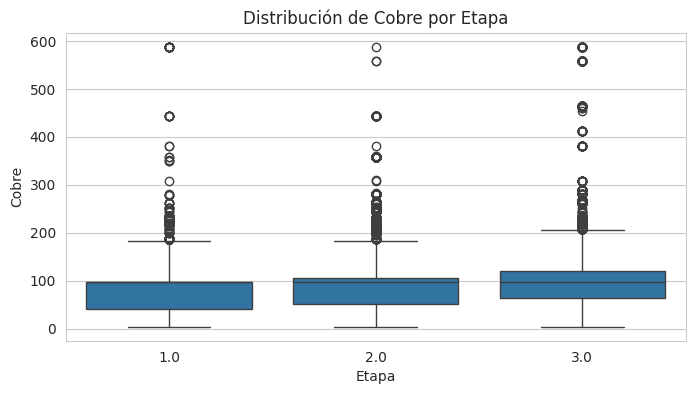

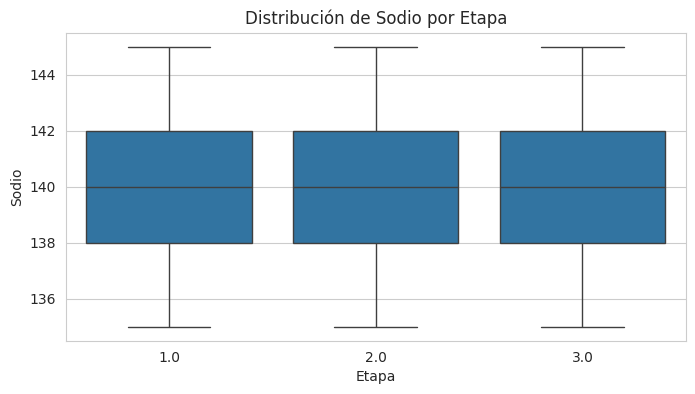

In [ ]:
sns.set_style("whitegrid")

features = data_sinlabels.columns[:-1]

#boxplot para cada variable
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Etapa', y=feature, data=data_final)
    plt.title(f'Distribución de {feature} por Etapa')
    plt.show()

## Histogramas
1. **Distribución de Edad:**

La distribución de frecuencias de edades tiene una forma aproximadamente normal. Esto significa que la mayoría de las personas se encuentran en torno a la media, y hay menos personas en los extremos de la distribución. Sin embargo, hay qye tener en cuenta estos últimos, ya que presentan una notoria diferencia.

2. **Distribución de Bilirrubina:**

La bilirrubina muestra una distribución unimodal con asimetría hacia la derecha. La mayoría de las personas presentan un nivel bajo de este indicador. A medida que aumenta la bilirrubina, la frecuencia va disminuyendo, por lo que se desprende que tener este índica alto es poco común.

3. **Distribución de Fosfata Alcalina:**

La Fosfata Alcalina muestra una distribución bimodal con una asimetría hacia la derecha. La mayoría de las personas tiene este índicca alrededor de 0 y 2000, teniendo un pico notable en 2000. A medida que aumenta, la Fosfata Alcalina disminuye, por lo que es poco común presentar altos valores de este índice.

4. **Distribución de SGOT:**

SGOT muestra una distribución parecida a una normal. Lo que sinifica que la mayoría de las personas se encuentran en torno a la media, y hay menos personas hacia los extremos. Sin embargo, el gráfico sugiere que existen outliers en el extremo derecho (valores altos).

5. **Distribución de Albumina:**

La Albumina, también presenta un gráfico aproximado a una normal, sin embargo presenta una asimetría hacia la izquierda, lo que indica que los valores son menos frecuentes pero más extendidos. La mayoría de los valores se encuentran entre 3,3 y 3,8, sugiriendo que este es el rango más común de este índice.

6. **Distribución de Protime:**

La variable Protime tiene una distribución medianamente parecida a una normal, sin embargo presenta varios picos alrededor de 10 y 12, por lo que la mayoría de los datos se encuentran en ese intervalo. Además se puede apreciar la presencia de valores extremos en el lado izquierdo de la curva, lo que sugiere la existencia de outliers.

7. **Distribución de Plaquetas:**

La variable Plaquetas se aproxima bastante a una normal, presentando una cola más larga en el lado izquierdo, indicando que para valores extremos existe una alta variabilidad, aunque son pocos estos casos "extremos".

8. **Distribución de Triglicéridos:**

La variable Protime tiene una distribución unimodal, donde la mayoría de lso datos se agrupa en el lado derecho, casi todos los datos se encuentran en el intervalo de 0-500. Además existe poca presencia de valores extremos.

9. **Distribución de Días:**

La variable Días tiene sus datos bastante distribuidos, sin embargo, la mayoría de ellos se agrupa en el lado derecho. En el lado izquierdo existen menos datos pero mayor variablidad. No existe un patrón claro sobre la cantidad de días.

10. **Distribución de Cobre:**

Esta variable presenta una distribución unimodal, teniendo un pico alrededor de 100. En el lado de derecho se concentran mayor cantidad de datos, pero en el izquierdo (si bien son menos) hay una mayor variabilidad. Sin embargo, el gráfico sufiere que en general los valores de cobre suelen ser más bajos que altos.

10. **Distribución de Sodio:**

Por último, la variable Sodio presenta varios picos que se distribuyen de manera normal, sin embargo entre estos picos de frecuencia, existen valores del índice que no presentan una frecuencia tan alta, son valores entre cada valor extremo, por lo que no permiten asegurar que se trate de una distribución normal. Sin embargo podemos ver que casi todos se agrupan en torno a la mediana.

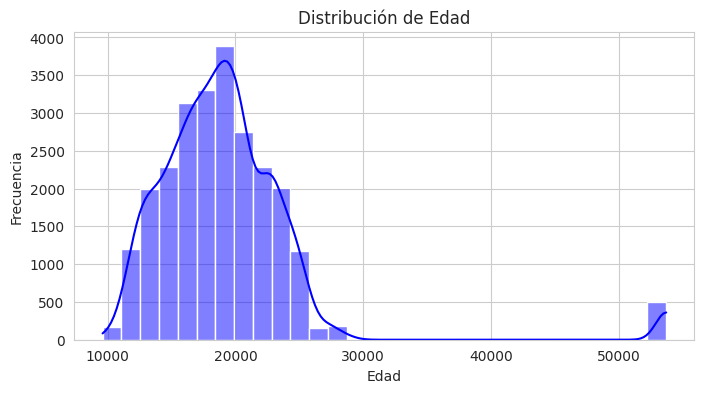

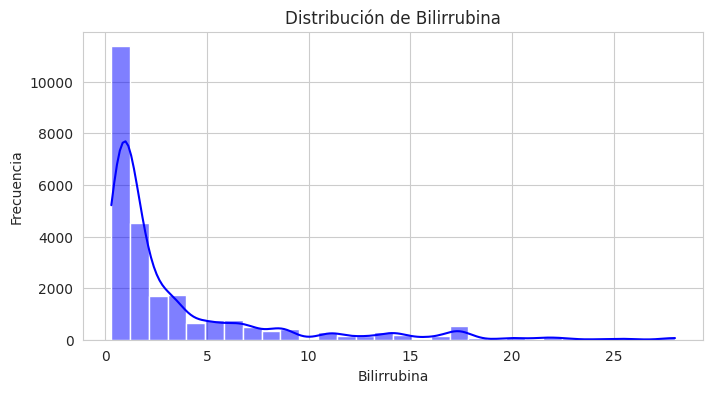

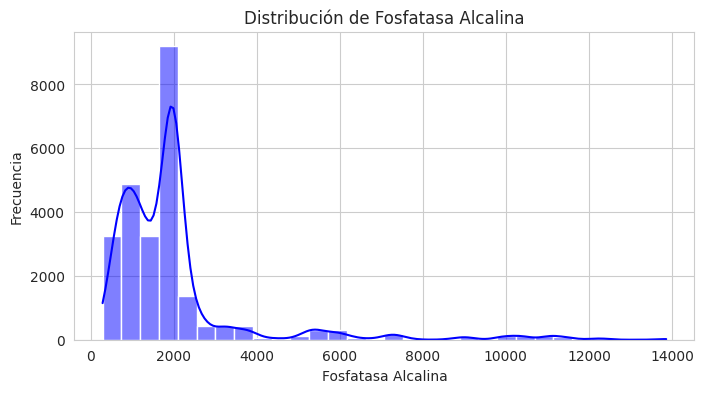

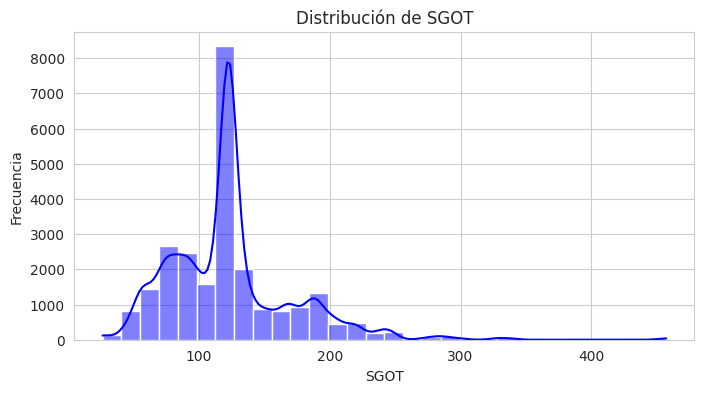

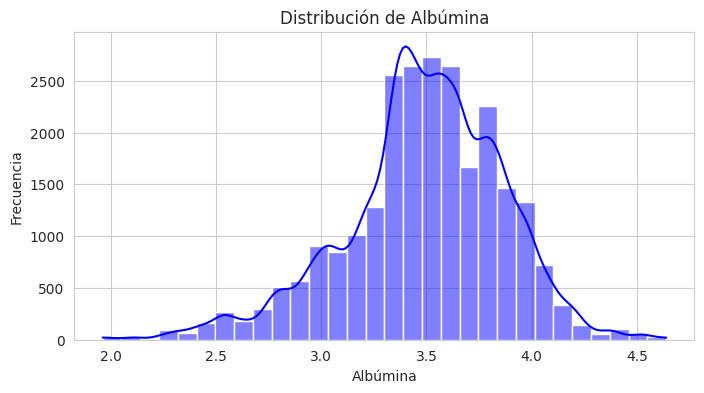

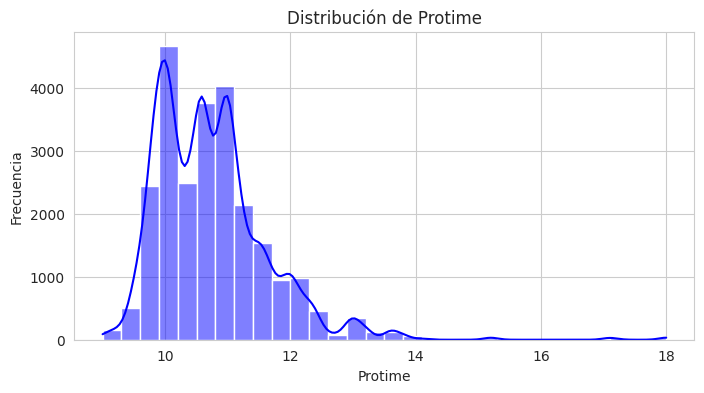

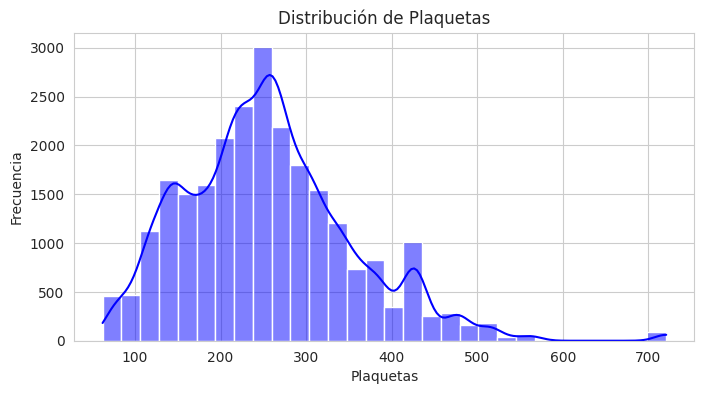

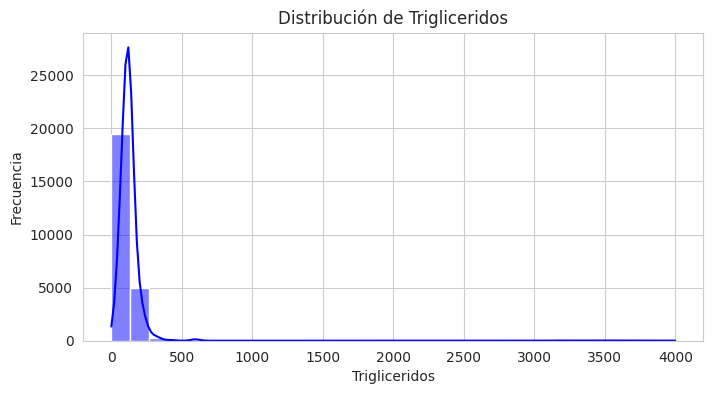

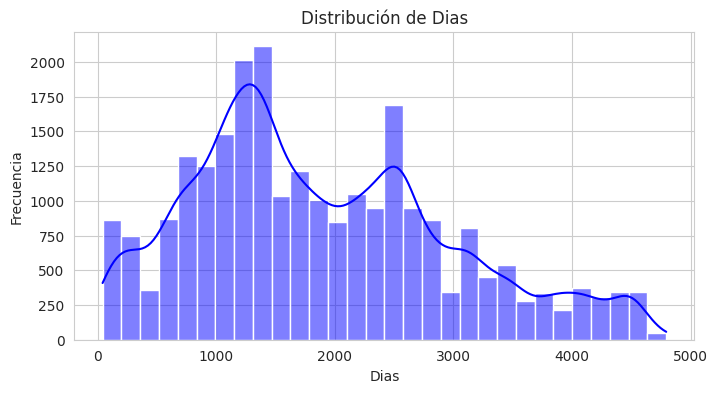

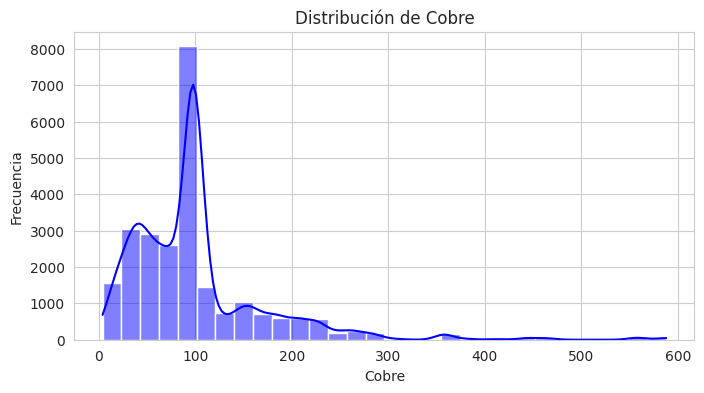

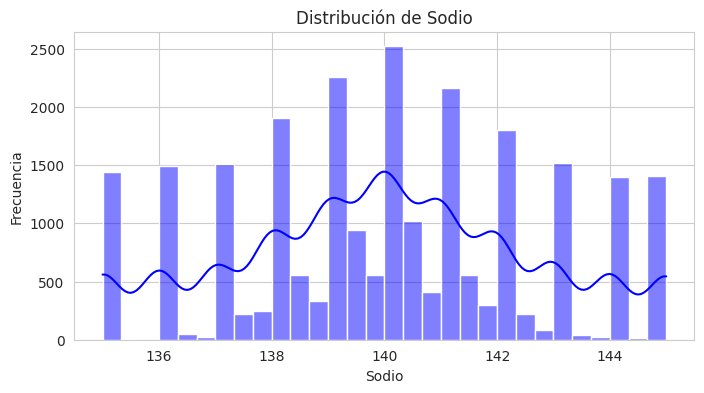

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 4))  # Define el tamaño de la figura
    sns.histplot(data_final[feature], bins=30, kde=True, color='blue')  # Histograma con estimación de densidad kernel (KDE)
    plt.title(f'Distribución de {feature}')  # Título del gráfico
    plt.xlabel(feature)  # Etiqueta del eje X
    plt.ylabel('Frecuencia')  # Etiqueta del eje Y
    plt.show()  # Muestra el gráfico



Con respecto a la distribución de la variable Etapa, en el gráfico se peude aprecciar que posee casi la misma frecuencia en cada una de ellas, no hay una muy predominante.

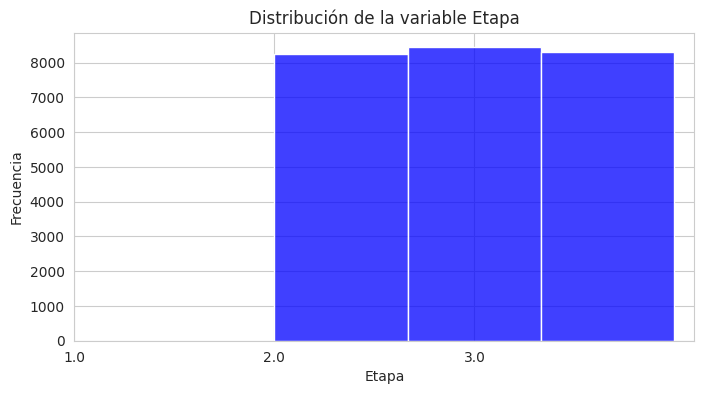

Conteo de registros por etapa:
Etapa
2.0    8441
3.0    8294
1.0    8265
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data_final['Etapa'], bins=len(data_final['Etapa'].unique()), kde=False, color='blue')
plt.title('Distribución de la variable Etapa')
plt.xlabel('Etapa')
plt.ylabel('Frecuencia')
plt.xticks(range(len(data['Etapa'].unique())), data_final['Etapa'].unique())
plt.show()

# Contar cuántos registros hay en cada 'Etapa'
etapa_counts = data_final['Etapa'].value_counts()
print(f"Conteo de registros por etapa:\n{etapa_counts}")

##Correlación de Pearson

En la tabla de correlaciones, se destacan varias relaciones importantes: la bilirrubina tiene una correlación positiva moderada con el cobre (0.432) y SGOT (0.368), y una correlación negativa con los días (-0.395) y la albúmina (-0.283). SGOT también correlaciona positivamente con el cobre (0.281) y el colesterol (0.264), y negativamente con los días (-0.221). La albúmina muestra una correlación positiva con los días (0.369) y negativas con la bilirrubina (-0.283) y SGOT (-0.163). Además, los días tienen una correlación negativa con la bilirrubina (-0.395), SGOT (-0.221) y el cobre (-0.281), pero positiva con la albúmina (0.369). Estas correlaciones sugieren importantes interacciones a tener en consideración entre biomarcadores y la progresión de la enfermedad, como el vínculo entre bilirrubina y cobre, y cómo los niveles de varios biomarcadores cambian con el tiempo.

In [ ]:
data_sinlabels.corr(method='pearson')

Edad  Bilirrubina  Fosfatasa Alcalina      SGOT  \
Edad                1.000000     0.000597            0.016822  0.000781   
Bilirrubina         0.000597     1.000000            0.112972  0.368024   
Fosfatasa Alcalina  0.016822     0.112972            1.000000  0.151769   
SGOT                0.000781     0.368024            0.151769  1.000000   
Albúmina           -0.065299    -0.283105           -0.125686 -0.162569   
Protime             0.019876     0.254145            0.072392  0.133210   
Plaquetas          -0.071788    -0.095162            0.007922 -0.093752   
Trigliceridos       0.006752     0.090507            0.032452  0.029394   
Dias               -0.034623    -0.394799            0.147792 -0.220532   
Cobre              -0.000653     0.432199            0.200772  0.281353   
Sodio              -0.002571     0.014971           -0.004224  0.007469   
Colesterol         -0.019205     0.273462            0.094323  0.263557   

                    Albúmina   Protime  Plaquetas  Trigliceridos      Dias  \
Edad               -0.065299  0.019876  -0.071788       0.006752 -0.034623   
Bilirrubina        -0.283105  0.254145  -0.095162       0.090507 -0.394799   
Fosfatasa Alcalina -0.125686  0.072392   0.007922       0.032452  0.147792   
SGOT               -0.162569  0.133210  -0.093752       0.029394 -0.220532   
Albúmina            1.000000 -0.215859   0.118662      -0.035575  0.368851   
Protime            -0.215859  1.000000  -0.156356       0.002755 -0.149960   
Plaquetas           0.118662 -0.156356   1.000000      -0.001767  0.115908   
Trigliceridos      -0.035575  0.002755  -0.001767       1.000000 -0.045110   
Dias                0.368851 -0.149960   0.115908      -0.045110  1.000000   
Cobre              -0.179171  0.141349  -0.074730       0.057605 -0.281349   
Sodio               0.000420  0.001377  -0.004345      -0.013065 -0.017960   
Colesterol         -0.057148 -0.002068   0.007162       0.052701 -0.095511   

                       Cobre     Sodio  Colesterol  
Edad               -0.000653 -0.002571   -0.019205  
Bilirrubina         0.432199  0.014971    0.273462  
Fosfatasa Alcalina  0.200772 -0.004224    0.094323  
SGOT                0.281353  0.007469    0.263557  
Albúmina           -0.179171  0.000420   -0.057148  
Protime             0.141349  0.001377   -0.002068  
Plaquetas          -0.074730 -0.004345    0.007162  
Trigliceridos       0.057605 -0.013065    0.052701  
Dias               -0.281349 -0.017960   -0.095511  
Cobre               1.000000  0.000006    0.107034  
Sodio               0.000006  1.000000    0.007554  
Colesterol          0.107034  0.007554    1.000000

En resumen, no hay una correlación significativa entre la edad y la mayoría de las variables analizadas, excepto en el caso de la albúmina y las plaquetas, que tienen una correlación negativa débil pero significativa.
Las correlaciones más fuertes y significativas entre variables (distintas de la edad) incluyen relaciones como entre bilirrubina y cobre, bilirrubina y días, y albúmina y días.
Las correlaciones con un valor p cercano a 0 sugieren que la relación observada es estadísticamente significativa.

In [ ]:
for feature in features:
  for feature2 in features:
    # Calculate Pearson correlation and p-value
    correlation, p_value = stats.pearsonr(data_final[feature2], data_final[feature])

    print(f"Correlación entre '{feature2}' y '{feature}':")
    print(f"Coeficiente de correlación de Pearson: {correlation}")
    print(f"Valor p: {p_value}")
    print("----")

Correlación entre 'Edad' y 'Edad':
Coeficiente de correlación de Pearson: 1.0
Valor p: 0.0
----
Correlación entre 'Bilirrubina' y 'Edad':
Coeficiente de correlación de Pearson: 0.0005966232501814993
Valor p: 0.9248472496906684
----
Correlación entre 'Fosfatasa Alcalina' y 'Edad':
Coeficiente de correlación de Pearson: 0.016821737780109963
Valor p: 0.007818579540146935
----
Correlación entre 'SGOT' y 'Edad':
Coeficiente de correlación de Pearson: 0.000781268792985821
Valor p: 0.9016927369052942
----
Correlación entre 'Albúmina' y 'Edad':
Coeficiente de correlación de Pearson: -0.0652990701604978
Valor p: 4.883702825647785e-25
----
Correlación entre 'Protime' y 'Edad':
Coeficiente de correlación de Pearson: 0.019876302584307948
Valor p: 0.0016729858622014004
----
Correlación entre 'Plaquetas' y 'Edad':
Coeficiente de correlación de Pearson: -0.07178845032977768
Valor p: 6.25735595557026e-30
----
Correlación entre 'Trigliceridos' y 'Edad':
Coeficiente de correlación de Pearson: 0.00675157

#### Correlación de Spearman


En la tabla de correlaciones, se destacan varias relaciones importantes: la bilirrubina tiene una correlación positiva moderada con el cobre (0.502), SGOT (0.421), fosfatasa alcalina (0.261), y los triglicéridos (0.364), y una correlación negativa con los días (-0.444) y la albúmina (-0.308). SGOT también correlaciona positivamente con el cobre (0.311), fosfatasa alcalina (0.371), y el colesterol (0.270), y negativamente con los días (-0.275). La albúmina muestra una correlación positiva con los días (0.369) y negativa con la bilirrubina (-0.308), SGOT (-0.181), y fosfatasa alcalina (-0.222). Además, los días tienen una correlación negativa con la bilirrubina (-0.444), SGOT (-0.275), fosfatasa alcalina (-0.104), triglicéridos (-0.216) y cobre (-0.353), pero positiva con la albúmina (0.369).

In [ ]:
data_sinlabels.corr(method='spearman')

Edad  Bilirrubina  Fosfatasa Alcalina      SGOT  \
Edad                1.000000    -0.020230            0.015579  0.016091   
Bilirrubina        -0.020230     1.000000            0.261438  0.420593   
Fosfatasa Alcalina  0.015579     0.261438            1.000000  0.371251   
SGOT                0.016091     0.420593            0.371251  1.000000   
Albúmina           -0.107178    -0.307829           -0.222104 -0.181425   
Protime             0.023928     0.250443            0.115188  0.144382   
Plaquetas          -0.125160    -0.148283           -0.010049 -0.101912   
Trigliceridos       0.026493     0.363721            0.278539  0.156393   
Dias               -0.053342    -0.443846           -0.104214 -0.274872   
Cobre               0.004374     0.501655            0.270685  0.310929   
Sodio               0.001395     0.021359           -0.001889  0.012402   
Colesterol          0.015378     0.241742            0.311595  0.269500   

                    Albúmina   Protime  Plaquetas  Trigliceridos      Dias  \
Edad               -0.107178  0.023928  -0.125160       0.026493 -0.053342   
Bilirrubina        -0.307829  0.250443  -0.148283       0.363721 -0.443846   
Fosfatasa Alcalina -0.222104  0.115188  -0.010049       0.278539 -0.104214   
SGOT               -0.181425  0.144382  -0.101912       0.156393 -0.274872   
Albúmina            1.000000 -0.224856   0.144421      -0.118615  0.369380   
Protime            -0.224856  1.000000  -0.224347       0.001666 -0.197838   
Plaquetas           0.144421 -0.224347   1.000000      -0.019075  0.129222   
Trigliceridos      -0.118615  0.001666  -0.019075       1.000000 -0.216155   
Dias                0.369380 -0.197838   0.129222      -0.216155  1.000000   
Cobre              -0.218073  0.150914  -0.079574       0.342800 -0.352975   
Sodio               0.003240  0.004705  -0.002074       0.014810 -0.019742   
Colesterol         -0.077895 -0.011407   0.002539       0.305256 -0.106529   

                       Cobre     Sodio  Colesterol  
Edad                0.004374  0.001395    0.015378  
Bilirrubina         0.501655  0.021359    0.241742  
Fosfatasa Alcalina  0.270685 -0.001889    0.311595  
SGOT                0.310929  0.012402    0.269500  
Albúmina           -0.218073  0.003240   -0.077895  
Protime             0.150914  0.004705   -0.011407  
Plaquetas          -0.079574 -0.002074    0.002539  
Trigliceridos       0.342800  0.014810    0.305256  
Dias               -0.352975 -0.019742   -0.106529  
Cobre               1.000000  0.008624    0.130758  
Sodio               0.008624  1.000000    0.002643  
Colesterol          0.130758  0.002643    1.000000

Las correlaciones con un valor p cercano a 0 sugieren que la relación observada es estadísticamente significativa.

In [ ]:
for feature in features:
  for feature2 in features:
    # Calculate Pearson correlation and p-value
    correlation, p_value = stats.spearmanr(data_final[feature2], data_final[feature])

    print(f"Correlación entre '{feature2}' y '{feature}':")
    print(f"Coeficiente de correlación de Spearman: {correlation}")
    print(f"Valor p: {p_value}")
    print("----")

Correlación entre 'Edad' y 'Edad':
Coeficiente de correlación de Spearman: 1.0
Valor p: 0.0
----
Correlación entre 'Bilirrubina' y 'Edad':
Coeficiente de correlación de Spearman: -0.02022975322238063
Valor p: 0.0013801417129193539
----
Correlación entre 'Fosfatasa Alcalina' y 'Edad':
Coeficiente de correlación de Spearman: 0.015578816294178151
Valor p: 0.013768255444774231
----
Correlación entre 'SGOT' y 'Edad':
Coeficiente de correlación de Spearman: 0.016091170780843322
Valor p: 0.010950483890076025
----
Correlación entre 'Albúmina' y 'Edad':
Coeficiente de correlación de Spearman: -0.10717808164539508
Valor p: 9.025082980490705e-65
----
Correlación entre 'Protime' y 'Edad':
Coeficiente de correlación de Spearman: 0.023927749788454654
Valor p: 0.00015453770423134102
----
Correlación entre 'Plaquetas' y 'Edad':
Coeficiente de correlación de Spearman: -0.12515982435301717
Valor p: 7.906541652535516e-88
----
Correlación entre 'Trigliceridos' y 'Edad':
Coeficiente de correlación de Spear

Algunos de los valores destacados que se encontrarón en la matriz de covarianza que se presenta a continuación son:
* Edad: La covarianza con otras variables muestra principalmente valores negativos o cercanos a cero, lo que sugiere que la edad no tiene una relación fuerte con las variables medidas en esta muestra específica.

* Bilirrubina: Presenta una covarianza positiva moderada con SGOT (82.72) y fosfatasa alcalina (956.67), indicando una posible asociación con la función hepática y la salud metabólica.

* Fosfatasa Alcalina: Tiene covarianzas altas con varios biomarcadores, como días (290,237.20) y plaquetas (1,406.25), lo que sugiere una fuerte relación con la salud ósea y hepática.

* SGOT: Muestra covarianzas moderadas con bilirrubina (82.72) y triglicéridos (343.64), indicando una asociación potencial con la función hepática y lipídica.

* Albúmina: La covarianza con otras variables es baja, pero sugiere una posible relación con el protime (0.82), indicando su papel en la función proteica y hepática.

* Protime: Tiene covarianzas bajas, pero muestra una relación con la albúmina (0.82), sugiriendo su influencia en la coagulación sanguínea y la función hepática.

* Plaquetas: Presenta una covarianza negativa con la edad (-43,684.84) y positiva con la fosfatasa alcalina (1,406.25), sugiriendo una relación inversa con la edad y una asociación con la salud hematológica.

* Triglicéridos: Tiene una covarianza positiva con el colesterol (59,948.12) y SGOT (343.64), indicando una asociación con el metabolismo lipídico y la función hepática.

* Días: Muestra una covarianza positiva alta con la fosfatasa alcalina (290,237.20) y una relación inversa con la edad (-233,083.40), sugiriendo una asociación con la duración de la hospitalización y posiblemente con la severidad de la enfermedad.

* Cobre: Presenta covarianzas moderadas con el sodio (0.94) y colesterol (1,710.43), indicando una asociación con el metabolismo mineral y lipídico.

* Sodio: Tiene una covarianza baja con el cobre (0.94), lo que sugiere una débil asociación con el equilibrio electrolítico y la función hepática.

* Colesterol: Muestra covarianzas positivas con los triglicéridos (59,948.12) y fosfatasa alcalina (37,049.38), indicando una asociación con el metabolismo lipídico y la salud hepática.

In [ ]:
data_sinlabels.cov()

Edad  Bilirrubina  Fosfatasa Alcalina  \
Edad                3.802795e+07    17.319729        1.866061e+05   
Bilirrubina         1.731973e+01    22.160469        9.566741e+02   
Fosfatasa Alcalina  1.866061e+05   956.674144        3.235990e+06   
SGOT                2.300401e+02    82.721312        1.303585e+04   
Albúmina           -1.532145e+02    -0.507082       -8.602654e+01   
Protime             1.108574e+02     1.082055        1.177807e+02   
Plaquetas          -4.368484e+04   -44.205868        1.406254e+03   
Trigliceridos       1.019400e+04   104.317511        1.429350e+04   
Dias               -2.330834e+05 -2028.923322        2.902372e+05   
Cobre              -2.949272e+02   148.899863        2.643193e+04   
Sodio              -4.196070e+01     0.186502       -2.011030e+01   
Colesterol         -2.585952e+04   281.090943        3.704938e+04   

                            SGOT    Albúmina     Protime     Plaquetas  \
Edad                  230.040129 -153.214494  110.857429 -43684.843241   
Bilirrubina            82.721312   -0.507082    1.082055    -44.205868   
Fosfatasa Alcalina  13035.847291  -86.026539  117.780746   1406.253955   
SGOT                 2279.834787   -2.953451    5.752623   -441.727749   
Albúmina               -2.953451    0.144771   -0.074283      4.455300   
Protime                 5.752623   -0.074283    0.818004    -13.954591   
Plaquetas            -441.727749    4.455300  -13.954591   9737.546182   
Trigliceridos         343.635546   -3.314167    0.610028    -42.684950   
Dias               -11495.363316  153.211839 -148.065357  12486.429844   
Cobre                 983.159737   -4.989199    9.356047   -539.686578   
Sodio                   0.943791    0.000423    0.003297     -1.134694   
Colesterol           2747.806670   -4.747907   -0.408326    154.319963   

                    Trigliceridos          Dias         Cobre      Sodio  \
Edad                 10193.997396 -2.330834e+05   -294.927236 -41.960699   
Bilirrubina            104.317511 -2.028923e+03    148.899863   0.186502   
Fosfatasa Alcalina   14293.495047  2.902372e+05  26431.927697 -20.110304   
SGOT                   343.635546 -1.149536e+04    983.159737   0.943791   
Albúmina                -3.314167  1.532118e+02     -4.989199   0.000423   
Protime                  0.610028 -1.480654e+02      9.356047   0.003297   
Plaquetas              -42.684950  1.248643e+04   -539.686578  -1.134694   
Trigliceridos        59948.120608 -1.205750e+04   1032.214757  -8.465424   
Dias                -12057.498589  1.191789e+06 -22478.404573 -51.888722   
Cobre                 1032.214757 -2.247840e+04   5356.020782   0.001247   
Sodio                   -8.465424 -5.188872e+01      0.001247   7.003445   
Colesterol            2817.515707 -2.276735e+04   1710.426463   4.364961   

                      Colesterol  
Edad               -25859.516966  
Bilirrubina           281.090943  
Fosfatasa Alcalina  37049.382199  
SGOT                 2747.806670  
Albúmina               -4.747907  
Protime                -0.408326  
Plaquetas             154.319963  
Trigliceridos        2817.515707  
Dias               -22767.352095  
Cobre                1710.426463  
Sodio                   4.364961  
Colesterol          47678.190680

# Visualización de relaciones entre variables

#### Scatter-plot

A continuación se detallarán algunas de las relaciones encontradas en los gráficos Scatter-plot:



*   **Edad v/s Bilirrubina:** En el gráfico se puede apreciar que la  mayoría de los datos de encuentran en la parte izquierda del gráfico, solo algunos puntos en la parte derecha (posibles outliers). No se observa una relación clara entre ambas variables, ya que a edades más bajas, se presentan tanto niveles altos como bajos de bilirrubina.
*   **Edad vs Fosfatasa Alcalina:** Aquí ocurre lo mismo que con el gráfico anterior, no se observa una relación clara, además de la presencia de ouliers.
*  **Bilirrubina vs Albúmina:** En este gráfico se puede observar que los pacientes con baja bilirrubina pueden presentar tanto niveles bajos como altos de albumina, sin embargo, a media que va subiendo la bilirrubina, el índice de Albúmnina tiende a estar en un rango mediano-alto.
* **Fosfatasa Alcalina vs SGOT:** En este gráfico se puede observar que en general SGOT se mantiene en niveles bajos, a pesar del aumento en la fosfata alcalina. Solo en niveles bajos de Fosfata, se presentan niveles altos de SGOT
* **Edad vs Triglicéridos:** En este gráfico se puede observar que a pesar del aumento en la edad, los pacientes presentan tanto niveles bajos como altos de triglicéridos, sin embargo se observa una separación, que podría significar que se está en presencia de outliers (en los niveles más altos).




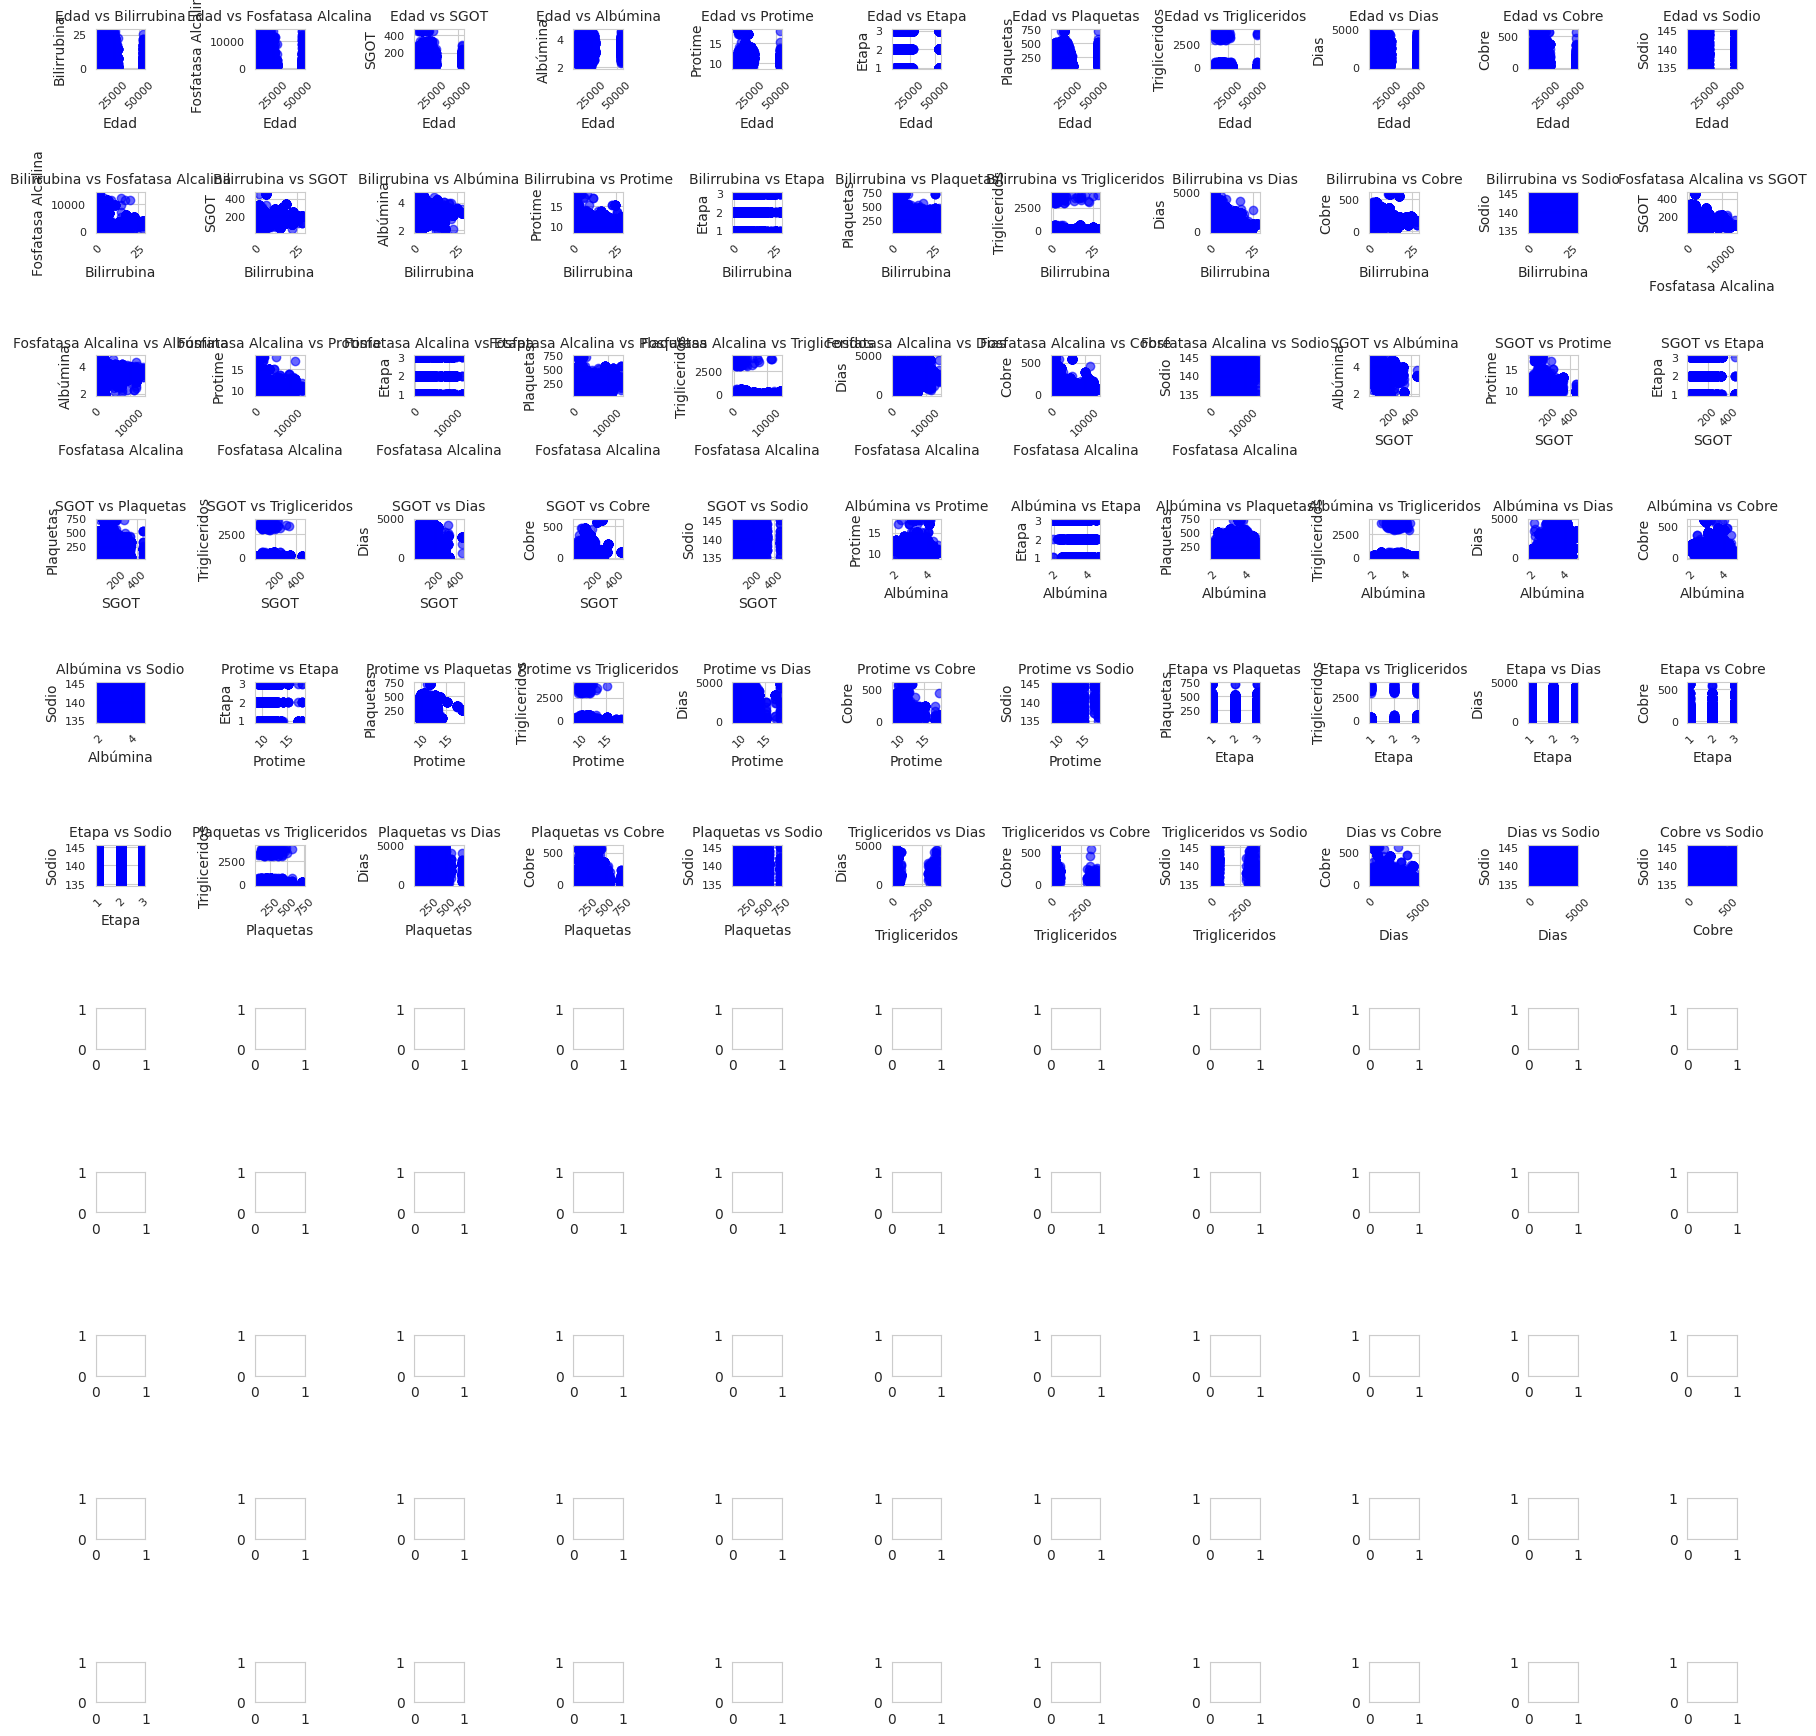

In [ ]:
# Lista de las variables para combinar en gráficos de dispersión
variables =  data_final.columns[:-1]
n_vars = len(variables)

fig, axes = plt.subplots(nrows=n_vars - 1, ncols=n_vars - 1, figsize=(18, 18))  # Ajustar tamaño según la cantidad de gráficos

plot_number = 0
for i in range(n_vars):
    for j in range(i + 1, n_vars):
        ax = plt.subplot(n_vars - 1, n_vars - 1, plot_number + 1)
        ax.scatter(data_final[variables[i]], data_final[variables[j]], alpha=0.6, color='blue')
        ax.set_xlabel(variables[i], fontsize=10)
        ax.set_ylabel(variables[j], fontsize=10)
        ax.set_title(f'{variables[i]} vs {variables[j]}', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        plot_number += 1

plt.tight_layout(pad=3.0)
plt.show()

#Medidas de similitud

###Distancia euclidiana

Se calculó la distancia euclidiana entre las medias de las características de cada par de etapas. La distancia entre las etapas 1 y 2 es de 458.25 unidades, indicando una diferencia moderada en sus características medias. La distancia entre las etapas 2 y 3 es considerablemente mayor, con 1545.48 unidades, sugiriendo diferencias más significativas. Finalmente, la distancia entre las etapas 1 y 3 es la más grande, con 1689.04 unidades, lo que resalta una notable disparidad en sus medias características.

In [ ]:
columnas_numericas = data_final.select_dtypes(include=[np.number]).columns.drop('Etapa')

print("Etapas disponibles en el dataset:")
print(data_final['Etapa'].unique())

etapa1_array = data_final[data_final['Etapa'] == 1][columnas_numericas].mean().to_numpy()
etapa2_array = data_final[data_final['Etapa'] == 2][columnas_numericas].mean().to_numpy()

distancia = np.linalg.norm(etapa1_array - etapa2_array)

print('Distancia euclidiana entre la media de las características de la etapa 1 y la etapa 2:', distancia)


etapa3_array = data_final[data_final['Etapa'] == 3][columnas_numericas].mean().to_numpy()

distancia_2_3 = np.linalg.norm(etapa2_array - etapa3_array)
distancia_1_3 = np.linalg.norm(etapa1_array - etapa3_array)

print('Distancia euclidiana entre la media de las características de la etapa 2 y la etapa 3:', distancia_2_3)
print('Distancia euclidiana entre la media de las características de la etapa 1 y la etapa 3:', distancia_1_3)


Etapas disponibles en el dataset:
[1. 2. 3.]
Distancia euclidiana entre la media de las características de la etapa 1 y la etapa 2: 458.2471732809968
Distancia euclidiana entre la media de las características de la etapa 2 y la etapa 3: 1545.475396593418
Distancia euclidiana entre la media de las características de la etapa 1 y la etapa 3: 1689.042498700359


##Heatmap

A continuación, se presentará un mapa de calor (heatmap) que representa la matriz de correlación entre diferentes características de un dataset. Este gráfico se construye a partir de la correlación de Pearson, la cual ya fue analizada en una sección previa. Pero a modo general, se puede ver que no existen correlaciones muy fuertes entre las variables, solo entre algunas se produce este efecto.



<Axes: >

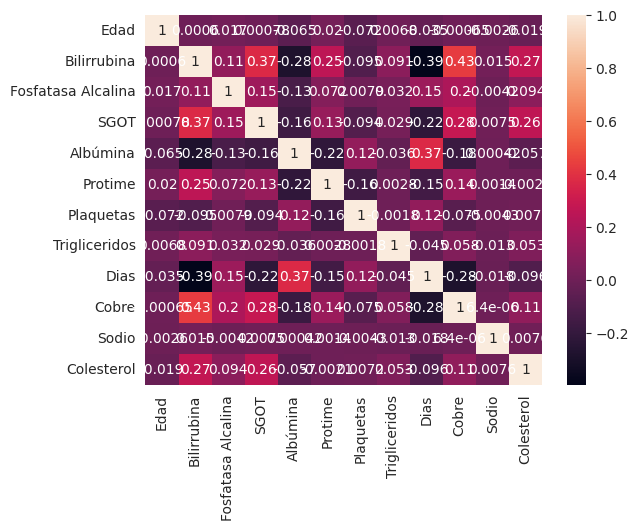

In [ ]:
# Heatmap de matriz de correlacion de pearson
corr_matrix = data_sinlabels.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

El mapa de calor a continuación (heatman normalizado) representa la matriz de correlación entre diferentes variables biométricas, como Edad, Bilirrubina, Fosfatasa Alcalina, SGOT, Albúmina, Protime, Plaquetas, Triglicéridos, Días, Cobre, Sodio y Colesterol. Los valores de correlación están normalizados en una escala de -1 a 3, donde los colores más oscuros representan correlaciones más bajas y los colores más claros y cálidos representan correlaciones más altas. En general, hay correlaciones negativas más extremas, pero en el caso de correlaciones positivas, no se presentan casos en donde sean muy altas.


<Axes: >

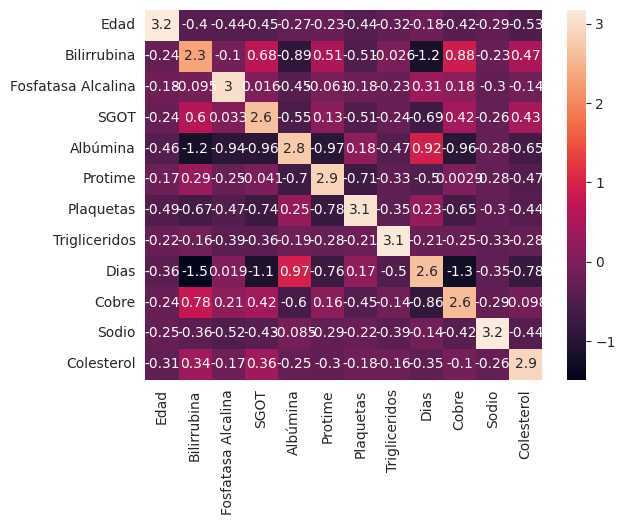

In [ ]:
# Normalizando
corr_matrix_norm = (corr_matrix - corr_matrix.mean()) / corr_matrix.std()
sns.heatmap(corr_matrix_norm, annot=True)

En el gráfico a continuación se representan múltiples características de los pacientes en función de las diferentes etapas de la cirrosis. Cada línea en el gráfico representa un paciente, y los ejes verticales corresponden a las distintas características clínicas. Las líneas de diferentes colores representan los promedios para las etapas 1.0, 2.0 y 3.0. Este tipo de gráfico es útil para visualizar cómo cambian las características a lo largo de las etapas de la enfermedad. Se puede observar que algunas variables, como la edad, la fosfatasa alcalina y los días, muestran diferencias notables entre las etapas, lo que sugiere que estas características pueden ser importantes en la progresión de la cirrosis.

Columnas disponibles en el DataFrame:
Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Country', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Sodium', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')


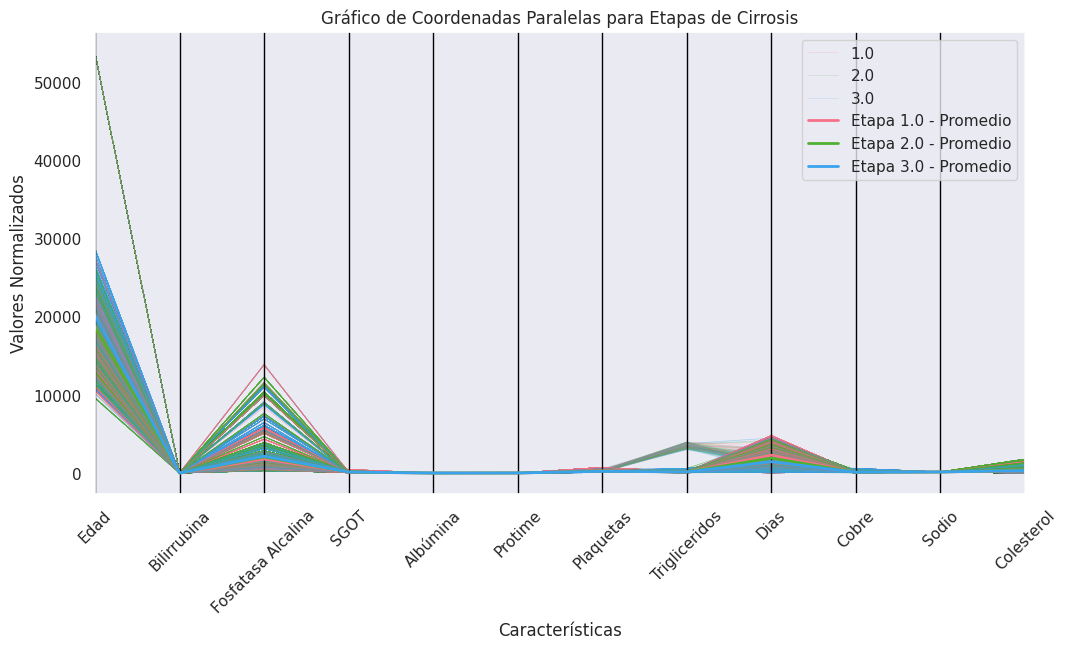

In [ ]:
# Configuración de estilo utilizando Seaborn
sns.set(style="darkgrid")

print("Columnas disponibles en el DataFrame:")
print(df.columns)

numerical_features = data_final.select_dtypes(include=[np.number]).columns.drop('Etapa')

# Use the extend method to combine the lists
selected_columns = ['Etapa']
selected_columns.extend(numerical_features)

data_numerical = data_final[selected_columns]

colors = sns.color_palette("husl", len(data_final['Etapa'].unique()))

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(
    data_numerical,
    'Etapa',
    color=colors,
    alpha=0.2,  #
    linewidth=0.5
)

mean_values = data_numerical.groupby('Etapa').mean().reset_index()

for i, color in zip(mean_values['Etapa'].unique(), colors):
    plt.plot(mean_values.columns[1:], mean_values.loc[mean_values['Etapa'] == i, mean_values.columns[1:]].values.flatten(),
             color=color, linewidth=2, label=f'Etapa {i} - Promedio')

plt.legend(loc='upper right')
plt.xlabel('Características')
plt.ylabel('Valores Normalizados')
plt.title('Gráfico de Coordenadas Paralelas para Etapas de Cirrosis')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

El gráfico a continuación muestra las características clínicas de los pacientes en diferentes etapas de la cirrosis en una escala logarítmica. Cada eje del gráfico representa una característica, y las líneas representan los promedios de las etapas 1.0, 2.0 y 3.0. Este gráfico permite comparar visualmente la magnitud de las características en diferentes etapas. Se observa que variables como la edad y la fosfatasa alcalina tienen valores significativamente más altos en comparación con otras características, indicando que pueden jugar un rol crucial en la diferenciación de las etapas de la enfermedad. Este tipo de visualización es útil para identificar rápidamente qué características varían más significativamente entre las etapas.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

columnas_numericas = data_final.select_dtypes(include=[np.number]).columns.drop('Etapa')

data_final['Etapa'] = data_final['Etapa'].astype(str)

etapas_disponibles = data_final['Etapa'].unique()
print("Etapas disponibles en el dataset:", etapas_disponibles)

fig = go.Figure()

for etapa in etapas_disponibles:
    etapa_data = data_final[data_final['Etapa'] == etapa][columnas_numericas]
    etapa_log_mean = np.log1p(etapa_data).mean().tolist()  # Aplicar transformación logarítmica y calcular la media

    fig.add_trace(go.Scatterpolar(
        r=etapa_log_mean,
        theta=columnas_numericas,
        fill='toself',
        name=f'Etapa {etapa}'
    ))

fig.update_layout(
    title='Gráfico de Radar para las Etapas de Cirrosis (Escala Logarítmica)',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(max([np.log1p(data_final[data_final['Etapa'] == e][columnas_numericas]).mean().tolist() for e in etapas_disponibles])) + 0.5]
        )
    ),
    showlegend=True
)

# Mostrar el gráfico
fig.show()


Etapas disponibles en el dataset: ['1.0' '2.0' '3.0']


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log1p



Las Caras de Chernoff representan visualmente datos multivariados mediante el uso de características faciales. Cada característica facial (como el tamaño de los ojos, la forma de la cara, la inclinación de las cejas, etc.) corresponde a una variable del conjunto de datos. En este caso, cada cara representa a un paciente con cirrosis, y las diferencias en las caras reflejan variaciones en las mediciones clínicas entre los pacientes. De lo obtenido se puede concluir lo siguiente:


*   Etapa 1: Las caras en la etapa 1.0 tienden a mostrar menos variabilidad en comparación con las etapas más avanzadas. La forma y las expresiones faciales son más homogéneas, lo que podría indicar valores clínicos menos extremos y menos variación en las mediciones.
*   Etapa 2: Las caras en la etapa 2.0 muestran más variabilidad que en la etapa 1.0. Hay diferencias más notables en la forma de la cara, la posición de los ojos y la inclinación de las cejas, lo que sugiere mayor variación en las mediciones clínicas.
* Etapa 3: Las caras en la etapa 3.0 muestran la mayor variabilidad y diferencias notables en las características faciales. Las expresiones faciales pueden ser más extremas, con ojos, cejas y formas de cara más distintivos, indicando valores clínicos más extremos. La diversidad en las caras refleja la variación en las mediciones clínicas, lo que sugiere una progresión significativa de la enfermedad en esta etapa.



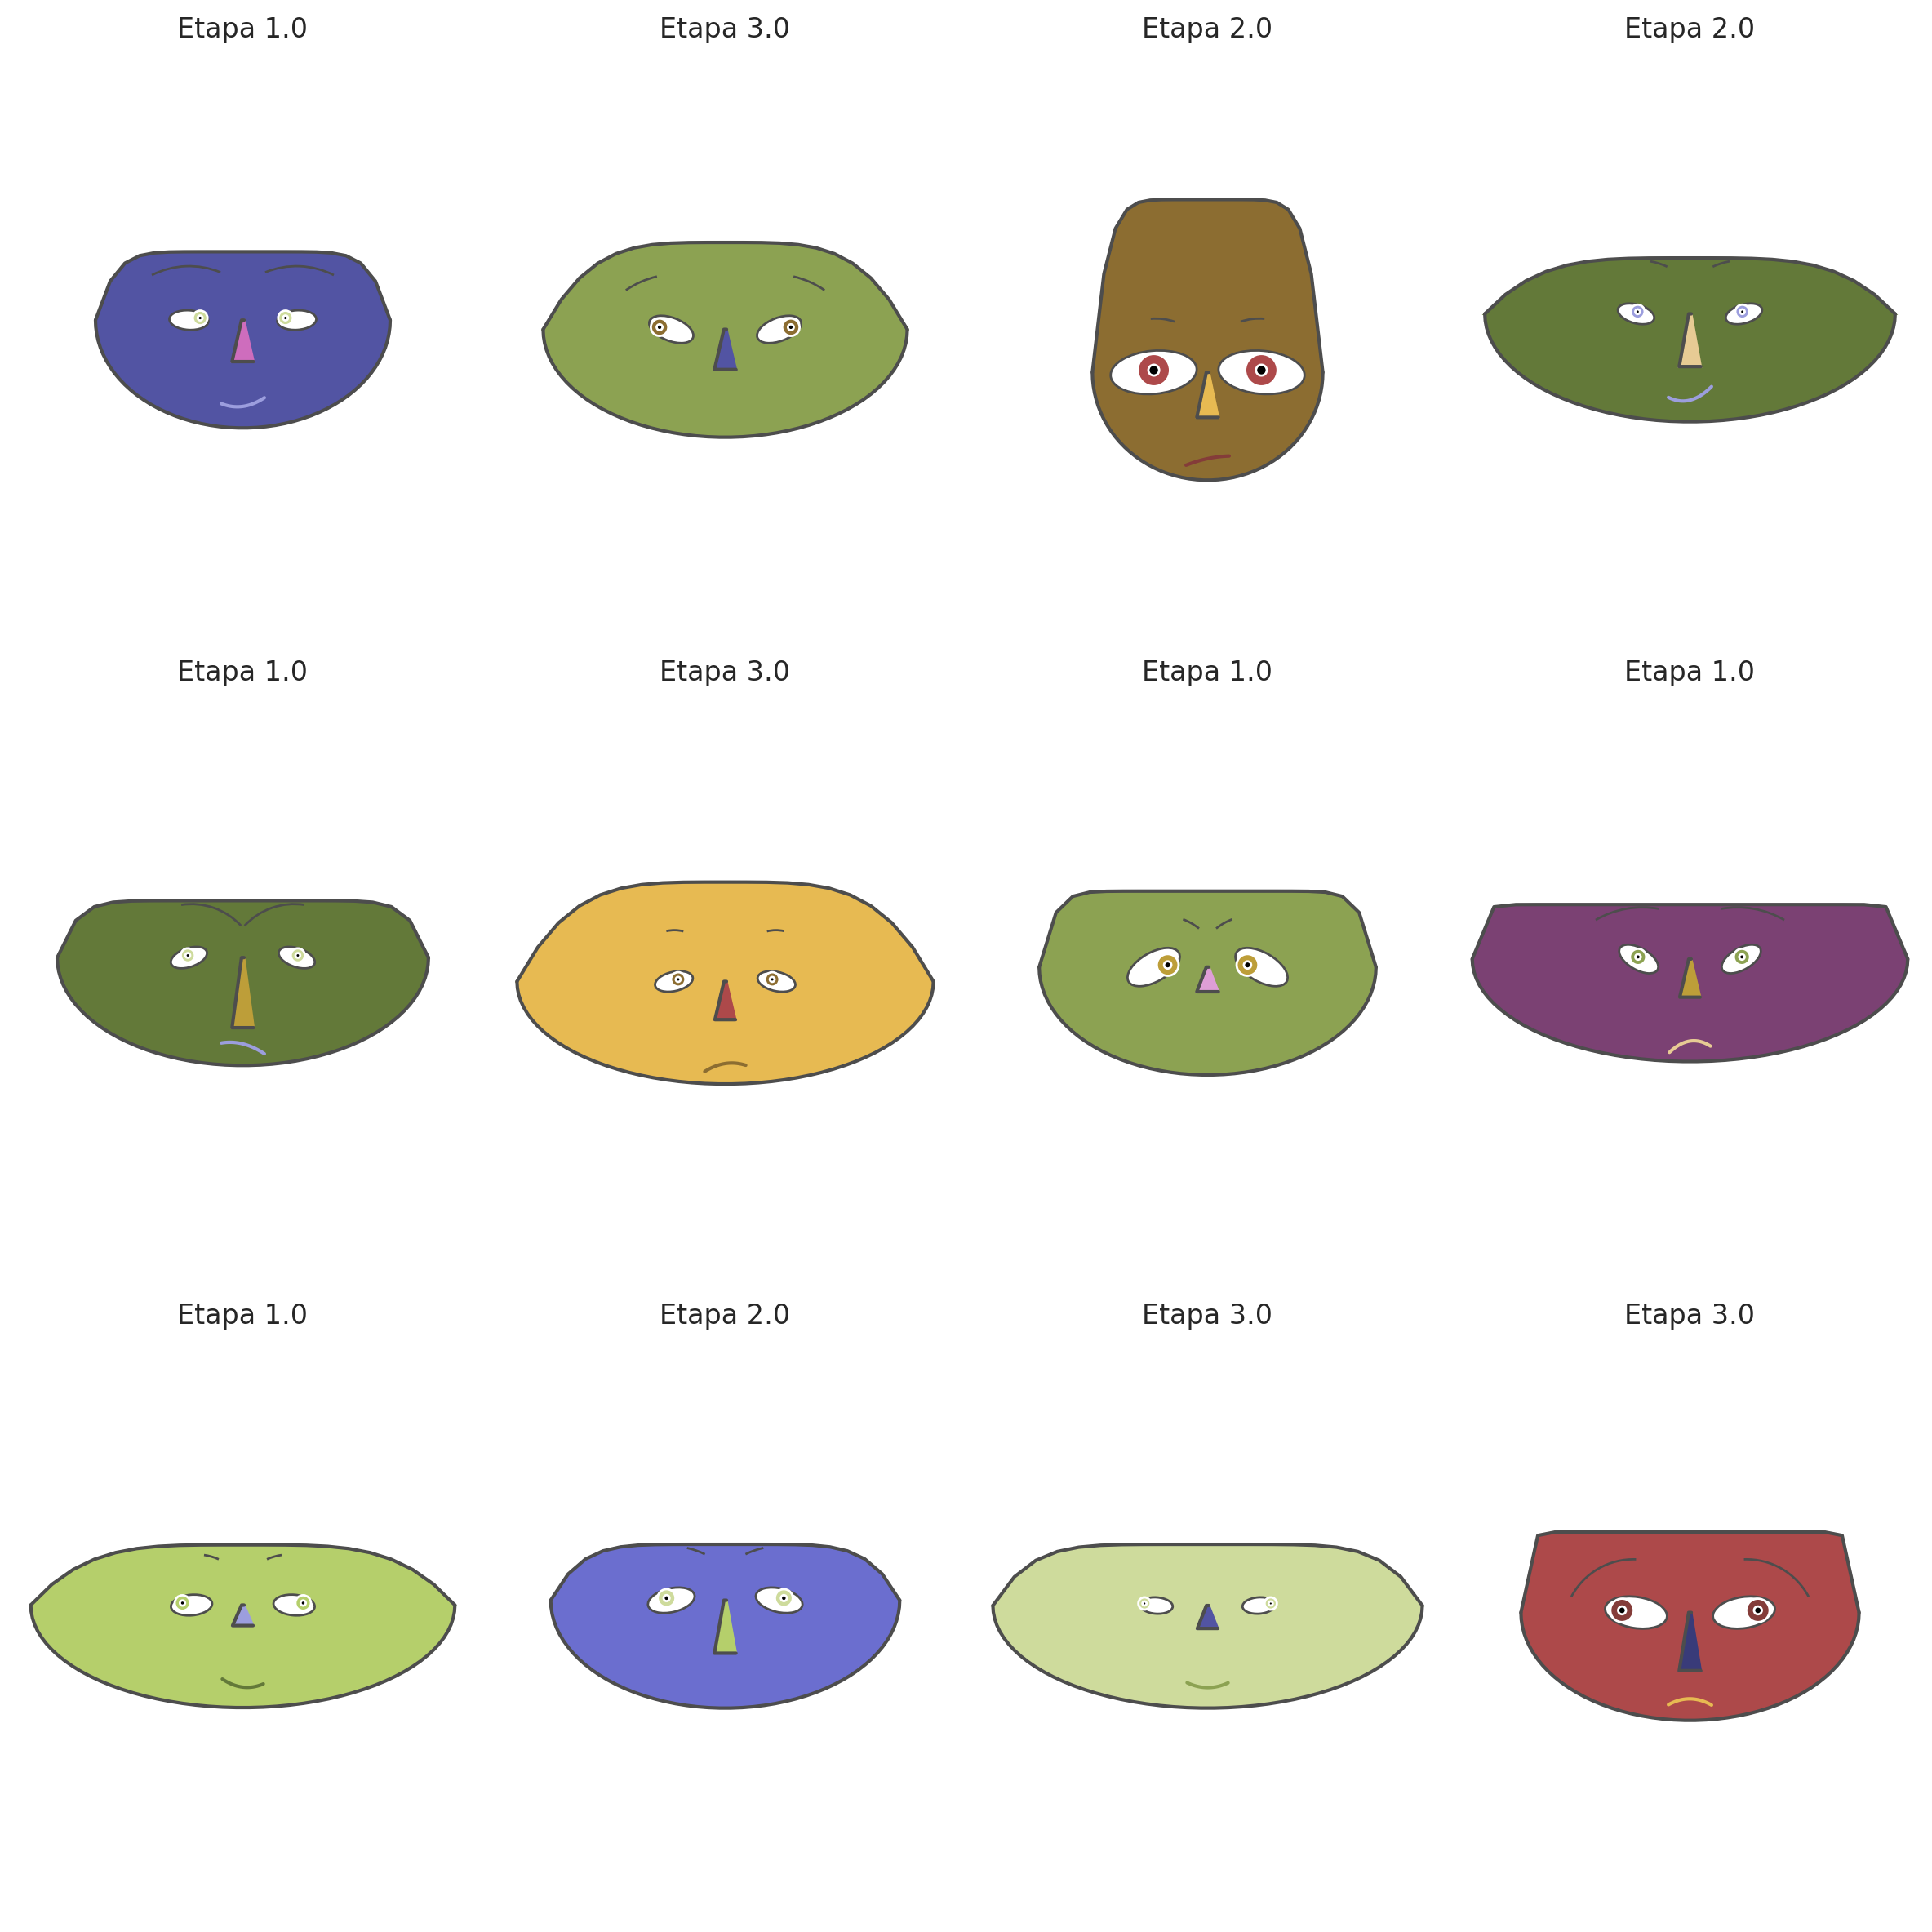

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
!pip install ChernoffFace # Install the missing module

from ChernoffFace import chernoff_face  # Asegúrate de tener la librería ChernoffFace instalada
from sklearn.preprocessing import MinMaxScaler

chernoff_data = data_final.sample(12)

chernoff_titles = chernoff_data['Etapa'].apply(lambda x: f'Etapa {x}').tolist()

# Drop 'Etapa' from the original DataFrame before selecting numerical columns
numeric_columns = data_final.drop('Etapa', axis=1).select_dtypes(include=[np.number]).columns
chernoff_numeric_data = chernoff_data[numeric_columns]

scaler = MinMaxScaler()
chernoff_numeric_data_normalized = pd.DataFrame(scaler.fit_transform(chernoff_numeric_data), columns=numeric_columns)

fig = chernoff_face(
    data=chernoff_numeric_data_normalized,
    n_columns=4,
    color_mapper=matplotlib.cm.tab20b,  # Puedes cambiar la paleta de colores si lo prefieres
    titles=chernoff_titles,
    figsize=(12, 12),
    dpi=200
)

fig.tight_layout()

plt.show()

## Análisis y Procedimientos

### Feature Cleaning

Luego de realizar el EDA, se debe ver realmente como se tratará la data y cambios efectivos que se realizarán en ella.

Este primer paso en el Feature Enginnering consiste en la limpieza de las características. Este proceso incluye la identificación y tratamiento de valores faltantes, la corrección de errores en los datos, y la normalización de los mismos.

Como primer paso, se cargan los datos, lo cual permite posteriormente realizar una visualización general de estos.

In [ ]:
#uploades = files.upload()
dataf = pd.read_csv("2024061002481050244E7A632E38__cirrhosis_stage.csv", encoding = "latin-1") #54035 datos
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Country        25000 non-null  object 
 6   Ascites        25000 non-null  object 
 7   Hepatomegaly   25000 non-null  object 
 8   Spiders        25000 non-null  object 
 9   Edema          25000 non-null  object 
 10  Bilirubin      25000 non-null  float64
 11  Cholesterol    25000 non-null  float64
 12  Albumin        25000 non-null  float64
 13  Sodium         15600 non-null  float64
 14  Copper         24995 non-null  float64
 15  Alk_Phos       25000 non-null  float64
 16  SGOT           25000 non-null  float64
 17  Tryglicerides  25000 non-null  float64
 18  Platel

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Country        25000 non-null  object 
 6   Ascites        25000 non-null  object 
 7   Hepatomegaly   25000 non-null  object 
 8   Spiders        25000 non-null  object 
 9   Edema          25000 non-null  object 
 10  Bilirubin      25000 non-null  float64
 11  Cholesterol    25000 non-null  float64
 12  Albumin        25000 non-null  float64
 13  Sodium         15600 non-null  float64
 14  Copper         24995 non-null  float64
 15  Alk_Phos       25000 non-null  float64
 16  SGOT           25000 non-null  float64
 17  Tryglicerides  25000 non-null  float64
 18  Platel

**Eliminación**

En esta sección, se aplicarán tres métodos diferentes para la eliminación de datos: eliminación de filas con valores nulos (Listwise), eliminación de filas con valores nulos específicos (Pairwise), y eliminación de columnas completas con valores nulos (Dropping Entire Columns).

**Eliminación de Filas con Valores Nulos (Listwise)**

En primer lugar, se aplicará el método de Listwise Deletion, el cual consiste en eliminar todas las filas que contienen al menos un valor nulo en cualquier columna.

Como resutado de esto, se redujo el número de filas de 25.000 a 15.596. Se perdieron casi 10.000 filas, lo que significa que un porcentaje significativo de los datos originales fue descartado. Si bien este método asegura que no hayan valores nulos presentes en ninguna columna, también se reduce significativamente la cantidad de datos disponibles para el análisis, lo cual afecta la representatividad de los mismos.

In [ ]:
# Listwise: Eliminamos aquellas filas que tengan valores nulos
data_listwise = dataf.dropna()
data_listwise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15596 entries, 1 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15596 non-null  int64  
 1   Status         15596 non-null  object 
 2   Drug           15596 non-null  object 
 3   Age            15596 non-null  int64  
 4   Sex            15596 non-null  object 
 5   Country        15596 non-null  object 
 6   Ascites        15596 non-null  object 
 7   Hepatomegaly   15596 non-null  object 
 8   Spiders        15596 non-null  object 
 9   Edema          15596 non-null  object 
 10  Bilirubin      15596 non-null  float64
 11  Cholesterol    15596 non-null  float64
 12  Albumin        15596 non-null  float64
 13  Sodium         15596 non-null  float64
 14  Copper         15596 non-null  float64
 15  Alk_Phos       15596 non-null  float64
 16  SGOT           15596 non-null  float64
 17  Tryglicerides  15596 non-null  float64
 18  Platelets  

**Eliminación de Filas con Valores Nulos Específicos (Pairwise)**

Tras obtener una gran pérdida de datos, se decidió explorar una segunda alternativa que permitiese conservar una mayor cantidad de información.

Para minimizar esta pérdida de datos, se aplicó el método de Pairwise Deletion. Este proceso elimina solo aquellas filas que contienen valores nulos en ciertas columnas específicas. Se seleccionaron las columnas 'Copper' y 'Sodium' para eliminar los datos NAs dentro de ellas, ya que previamente se observó que poseen valores NAs dentro de ellas.

Como resultado de este proceso, el conjunto de datos resultante contiene 15596 entradas, lo que representa una périda de información igual a la anterior.

In [ ]:
# Pairwise: Eliminamos solo aquellas filas que tengan cierto parametro nulo
data_pairwise = dataf.dropna(subset=['Copper', 'Sodium'])
data_pairwise.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15596 entries, 1 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15596 non-null  int64  
 1   Status         15596 non-null  object 
 2   Drug           15596 non-null  object 
 3   Age            15596 non-null  int64  
 4   Sex            15596 non-null  object 
 5   Country        15596 non-null  object 
 6   Ascites        15596 non-null  object 
 7   Hepatomegaly   15596 non-null  object 
 8   Spiders        15596 non-null  object 
 9   Edema          15596 non-null  object 
 10  Bilirubin      15596 non-null  float64
 11  Cholesterol    15596 non-null  float64
 12  Albumin        15596 non-null  float64
 13  Sodium         15596 non-null  float64
 14  Copper         15596 non-null  float64
 15  Alk_Phos       15596 non-null  float64
 16  SGOT           15596 non-null  float64
 17  Tryglicerides  15596 non-null  float64
 18  Platelets  

**Eliminación de Columnas con Valores Nulos (Dropping Entire Columns)**

Por último, se analizará otro enfoque, que consiste en el preprocesamiento de datos para eliminar columnas que no son relevantes o que contienen una cantidad significativa de valores faltantes. Tomando como base el análisis previo que se hizo sobre las variables, se tomó como posibles candidatas a ser eliminadas las columnas 'Copper' y 'Sodium'. La última presenta una cantidad significativa de NAs, sin embargo Copper

In [ ]:
# Dropping entire columns: Eliminamos la columna que tenga valores nulos
dataf_column = dataf.drop(['Copper', 'Sodium'], axis=1)
dataf_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Country        25000 non-null  object 
 6   Ascites        25000 non-null  object 
 7   Hepatomegaly   25000 non-null  object 
 8   Spiders        25000 non-null  object 
 9   Edema          25000 non-null  object 
 10  Bilirubin      25000 non-null  float64
 11  Cholesterol    25000 non-null  float64
 12  Albumin        25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

Luego de analizar estos tres métodos de eliminación, el equipo concluye que el que mejor se ajusta a este caso es el de Dropping Entire Columns. Con los otros dos métodos, se pierden muchos datos e información debido a la gran cantidad de valores NA presentes en la columna 'Sodium'. Eliminar esta columna específica permite conservar una mayor cantidad de datos útiles y relevantes para el análisis sin comprometer significativamente la integridad del conjunto de datos. Por lo que es considerado para ser aplicado en la creación del modelo.

**Imputación**

Para la imputación de valores faltantes aplicamos KNN debido a que este algoritmo es capaz de considerar la similitud entre los datos al buscar los vecinos más cercanos, lo que permite una imputación más precisa y contextualizada al utilizar la información disponible de los datos más similares.

In [ ]:
# Alternativa con KNN para imputación de valores faltantes

# Crear un objeto KNNImputer
knn_imp = KNNImputer(n_neighbors=5)

# Aquí se hará una diferencia con las variables que se usarán para la clusterización y para los modelos
#para la clusterización:
numeric_columns = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Stage', 'Platelets', 'Tryglicerides', 'N_Days', 'Copper', 'Sodium', 'Cholesterol']
data_numeric = dataf[numeric_columns]

#para los modelos:
numeric_columns2 = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', 'Sodium']
#crear copia dataf
datafmodelo = dataf.copy()
data_numeric2 = datafmodelo[numeric_columns2]
# Aplicar KNNImputer a las columnas numéricas
data_imputed = pd.DataFrame(knn_imp.fit_transform(data_numeric), columns=numeric_columns)
data_imputed2 = pd.DataFrame(knn_imp.fit_transform(data_numeric2), columns=numeric_columns2)



# Actualizar el DataFrame original con las columnas imputadas
for col in numeric_columns:
    dataf[col] = data_imputed[col]

for col2 in numeric_columns2:
    datafmodelo[col2] = data_imputed2[col2]

# Información después de la imputación con KNN
print("\nInformación después de la imputación con KNN:")
print(dataf.info())

# Ver las primeras filas del DataFrame después de la imputación
print("\nPrimeras filas del DataFrame después de la imputación:")
print(dataf.head())
print(datafmodelo.head())

sns.set_style("whitegrid")





Información después de la imputación con KNN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  float64
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  float64
 4   Sex            25000 non-null  object 
 5   Country        25000 non-null  object 
 6   Ascites        25000 non-null  object 
 7   Hepatomegaly   25000 non-null  object 
 8   Spiders        25000 non-null  object 
 9   Edema          25000 non-null  object 
 10  Bilirubin      25000 non-null  float64
 11  Cholesterol    25000 non-null  float64
 12  Albumin        25000 non-null  float64
 13  Sodium         25000 non-null  float64
 14  Copper         25000 non-null  float64
 15  Alk_Phos       25000 non-null  float64
 16  SGOT           25000 non-null  float64
 17  Try

**Outliers**


El siguiente código tiene como objetivo penalizar outliers en las columnas 'Copper', 'Sodium' y 'Bilirubin' de un DataFrame dataf en lugar de eliminarlos. El proceso consiste en reemplazar estos valores atípicos con los valores de los límites superior e inferior, utilizando la técnica de winsorización. Esto permite mantener todos los datos dentro del conjunto, minimizando el impacto de los valores atípicos extremos y mejorando la calidad del análisis posterior.

In [ ]:
# Selección de subconjuntos de datos
data_copper = dataf[['Copper', 'Stage']]
data_sodium = dataf[['Sodium', 'Stage']]
data_bilirubin = dataf[['Bilirubin', 'Stage']]

# Definición de la función para penalizar outliers
def penalize_outliers(data, column_name):
    quartiles = data[column_name].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_whisker = quartiles[0.25] - 1.5 * IQR
    upper_whisker = quartiles[0.75] + 1.5 * IQR
    data[column_name] = data[column_name].apply(
        lambda x: lower_whisker if x < lower_whisker else upper_whisker if x > upper_whisker else x
    )
    return data

# Aplicación de la función a los subconjuntos de datos
data_copper_penalized = penalize_outliers(data_copper.copy(), 'Copper')
data_sodium_penalized = penalize_outliers(data_sodium.copy(), 'Sodium')
data_bilirubin_penalized = penalize_outliers(data_bilirubin.copy(), 'Bilirubin')

# Información después de la penalización de outliers
print("\nInformación después de penalizar outliers en 'Copper':")
print(data_copper_penalized.describe())

print("\nInformación después de penalizar outliers en 'Sodium':")
print(data_sodium_penalized.describe())

print("\nInformación después de penalizar outliers en 'Bilirubin':")
print(data_bilirubin_penalized.describe())



Información después de penalizar outliers en 'Copper':
             Copper        Stage
count  25000.000000  25000.00000
mean      92.504563      2.00116
std       49.760472      0.81387
min        4.000000      1.00000
25%       52.000000      1.00000
50%       97.648387      2.00000
75%      107.000000      3.00000
max      189.500000      3.00000

Información después de penalizar outliers en 'Sodium':
             Sodium        Stage
count  25000.000000  25000.00000
mean     139.985152      2.00116
std        2.646402      0.81387
min      135.000000      1.00000
25%      138.000000      1.00000
50%      140.000000      2.00000
75%      142.000000      3.00000
max      145.000000      3.00000

Información después de penalizar outliers en 'Bilirubin':
          Bilirubin        Stage
count  25000.000000  25000.00000
mean       2.546344      2.00116
std        2.359092      0.81387
min        0.300000      1.00000
25%        0.800000      1.00000
50%        1.300000      2.00000
75% 

**Normalización**
El siguiente código tiene como objetivo normalizar varias columnas de un DataFrame dataf utilizando la técnica de Min-Max Scaling. Este proceso se lleva a cabo con la ayuda de la biblioteca sklearn.preprocessing, específicamente utilizando la clase MinMaxScaler. La normalización transforma las características de manera que sus valores estén en un rango de 0 a 1, lo cual es útil para ciertos algoritmos de machine learning que son sensibles a la escala de los datos. Las columnas que se están normalizando son: 'Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', y 'Sodium'

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



print("Nombres de las columnas en el DataFrame:")
print(dataf.columns)

data_minmax = dataf.copy()

columns_to_normalize = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', 'Sodium']

scaler_minmax = MinMaxScaler()

data_minmax[columns_to_normalize] = scaler_minmax.fit_transform(dataf[columns_to_normalize])

print("Datos Normalizados con Min-Max Scaling:\n", data_minmax.head(10))


Nombres de las columnas en el DataFrame:
Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Country', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Sodium', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')
Datos Normalizados con Min-Max Scaling:
    N_Days Status     Drug       Age Sex         Country Ascites Hepatomegaly  \
0  2221.0      C  Placebo  0.201700   F        Malaysia       N            Y   
1  1230.0      C  Placebo  0.229458   M   United States       Y            N   
2  4184.0      C  Placebo  0.050782   F          Sweden       N            N   
3  2090.0      D  Placebo  0.155654   F         Iceland       N            N   
4  2105.0      D  Placebo  1.000000   F          Turkey       N            Y   
5  4427.0      C  Placebo  0.154543   F         Ireland       N            N   
6  1418.0      C  Placebo  0.303943   F           Japan       Y           

Ahora se tiene como objetivo normalizar varias columnas de otra manera, utilizando la técnica de Z-score Scaling. Este proceso se lleva a cabo con la ayuda de la biblioteca sklearn.preprocessing, específicamente utilizando la clase StandardScaler. La normalización mediante Z-score Scaling transforma las características de manera que tengan una media de 0 y una desviación estándar de 1, lo cual es útil para ciertos algoritmos de machine learning que son sensibles a la escala de los datos. Las columnas que se están normalizando son: 'Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', y 'Sodium'.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

data_standard = dataf.copy()

columns_to_normalize = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', 'Sodium']

data_standard[columns_to_normalize] = scaler_standard.fit_transform(dataf[columns_to_normalize])

print("Datos Normalizados con Z-score Scaling:\n", data_standard.head(10))

Datos Normalizados con Z-score Scaling:
    N_Days Status     Drug       Age Sex         Country Ascites Hepatomegaly  \
0  2221.0      C  Placebo -0.113492   F        Malaysia       N            Y   
1  1230.0      C  Placebo  0.085160   M   United States       Y            N   
2  4184.0      C  Placebo -1.193511   F          Sweden       N            N   
3  2090.0      D  Placebo -0.443012   F         Iceland       N            N   
4  2105.0      D  Placebo  5.599420   F          Turkey       N            Y   
5  4427.0      C  Placebo -0.450958   F         Ireland       N            N   
6  1418.0      C  Placebo  0.618196   F           Japan       Y            N   
7    51.0      D  Placebo  5.599420   F          Canada       Y            N   
8  2504.0      C  Placebo -0.637934   F          Russia       N            N   
9  1012.0      D  Placebo  0.499654   M  United Kingdom       Y            N   

  Spiders Edema  ...  Cholesterol   Albumin    Sodium    Copper  Alk_Phos  \
0

**Discretización**


El objetivo es transformar varias columnas, dividiéndolas en intervalos con el mismo número de observaciones, utilizando la técnica de discretización por igual frecuencia. Para esto, se usa la función pd.qcut de la biblioteca pandas. Discretizar los datos convierte las variables continuas en categóricas, lo que puede ser útil para algunos algoritmos de machine learning que funcionan mejor con datos categóricos o para facilitar la interpretación de los datos. Las columnas que se están discretizando son: 'Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', y 'Sod

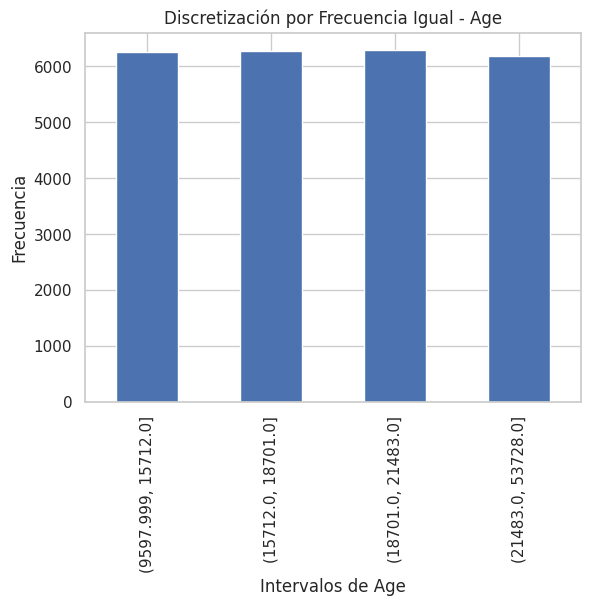

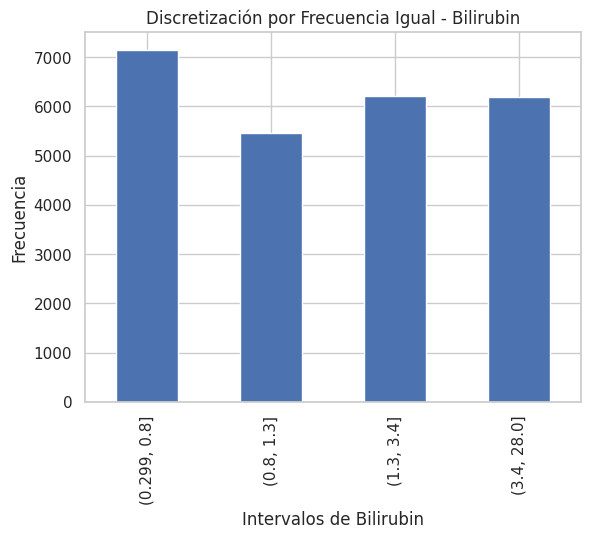

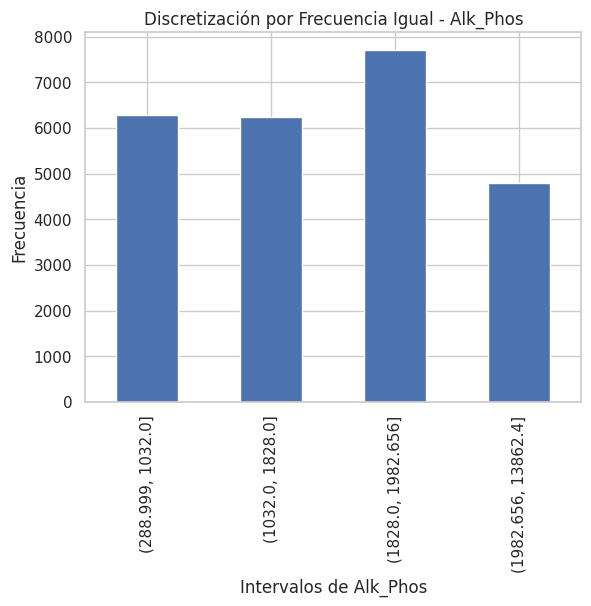

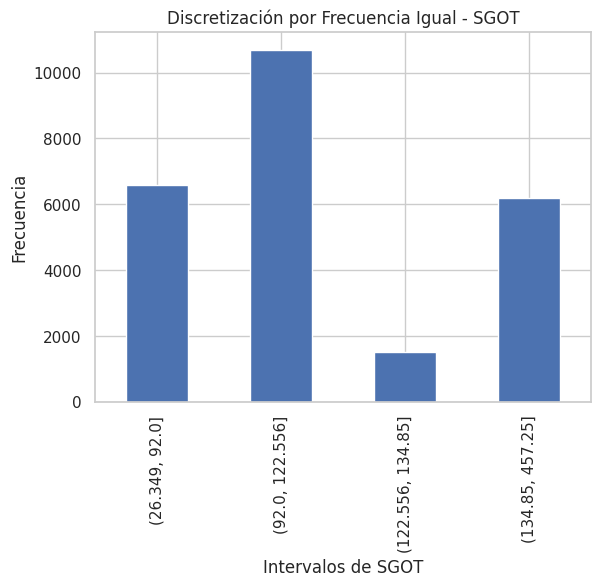

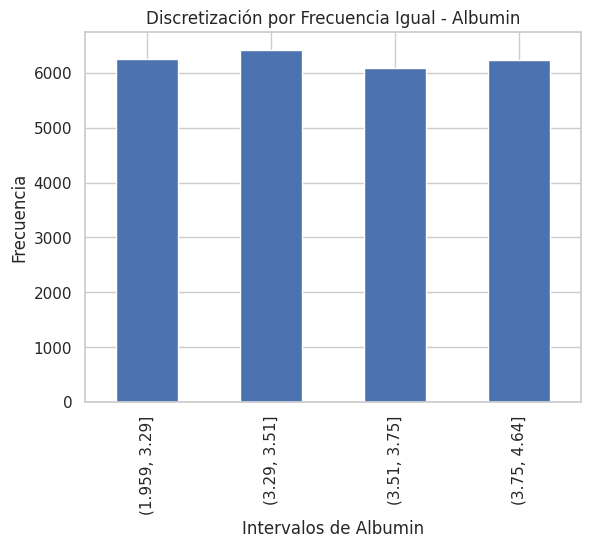

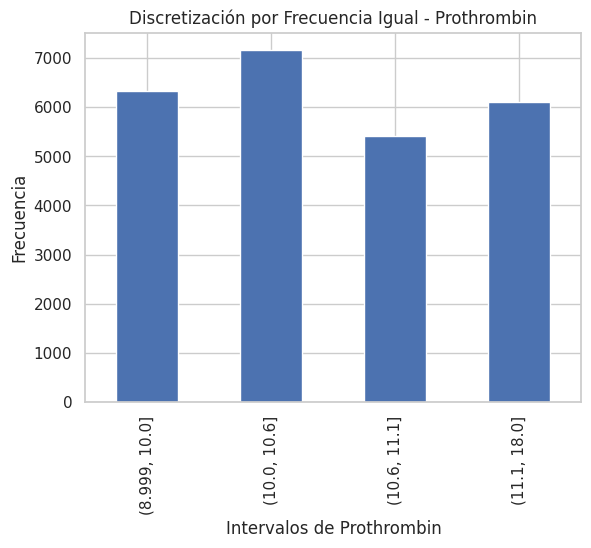

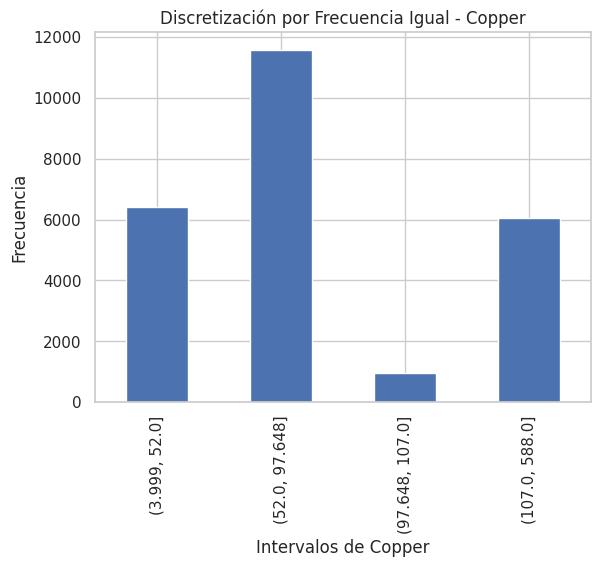

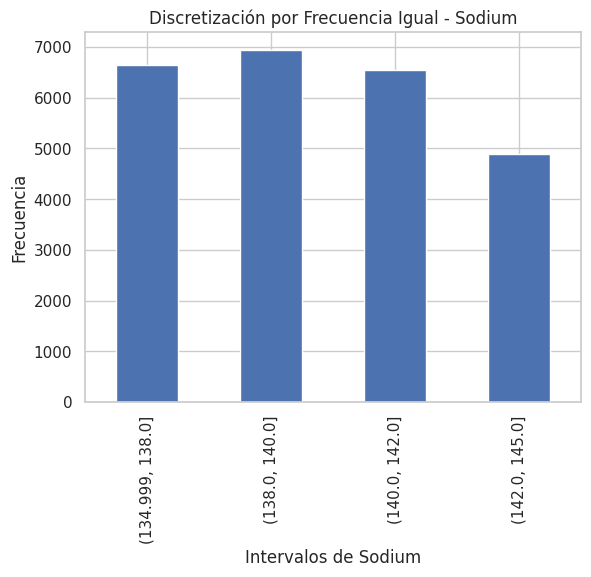

In [ ]:
data_discrete = dataf.copy()

variables_a_discretizar = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', 'Sodium']

for var in variables_a_discretizar:
    data_discrete[f'{var} (frecuencia)'] = pd.qcut(dataf[var], q=4)

    # Contar las frecuencias en cada intervalo para la variable actual
    data_discrete_freq = data_discrete.groupby([f'{var} (frecuencia)'])[f'{var} (frecuencia)'].count()

    # Graficar las frecuencias para la variable actual
    data_discrete_freq.plot(kind='bar', title=f'Discretización por Frecuencia Igual - {var}')
    plt.xlabel(f'Intervalos de {var}')
    plt.ylabel('Frecuencia')
    plt.show()

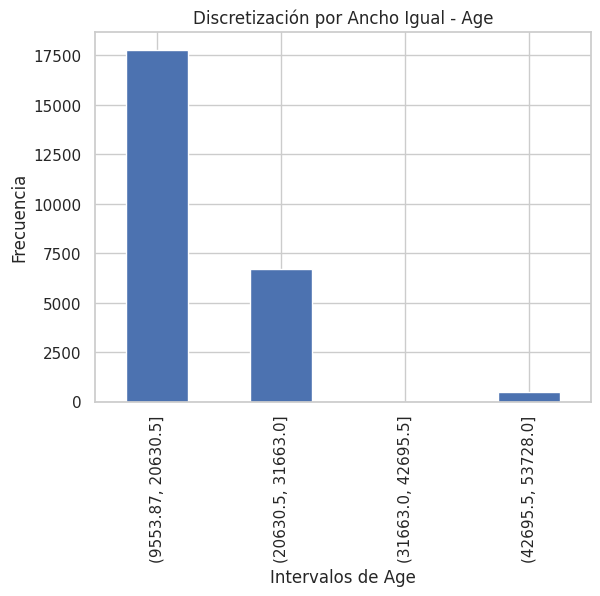

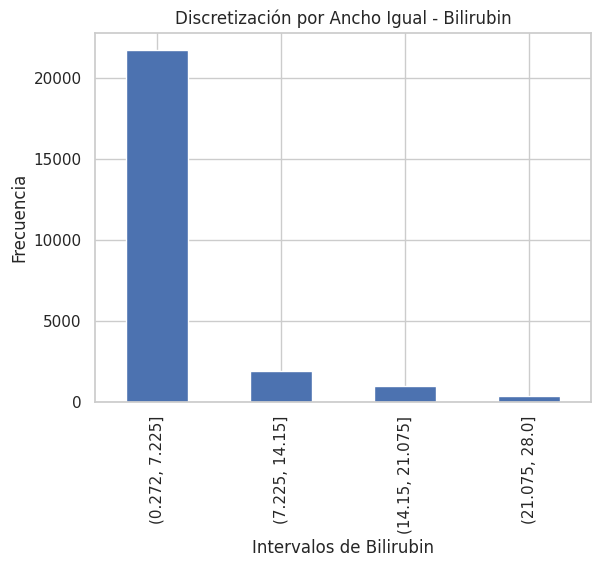

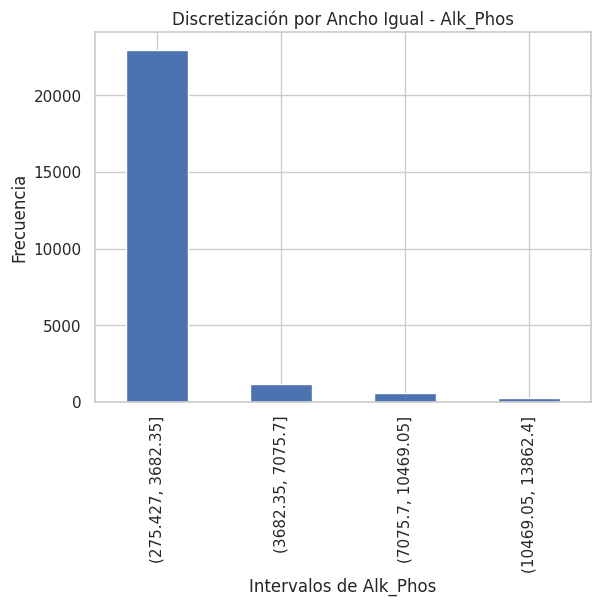

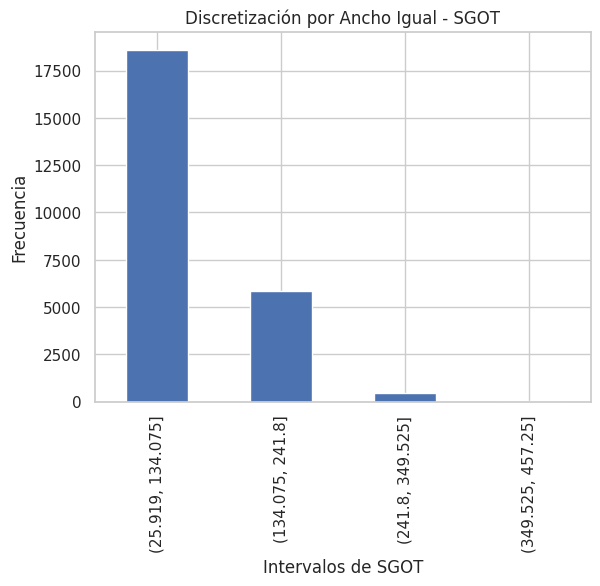

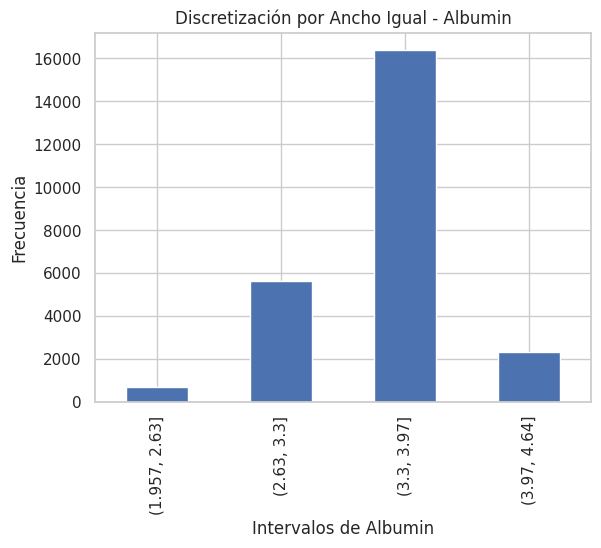

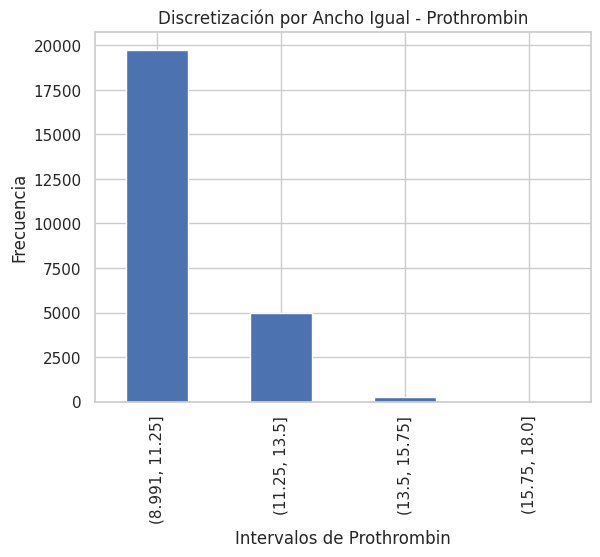

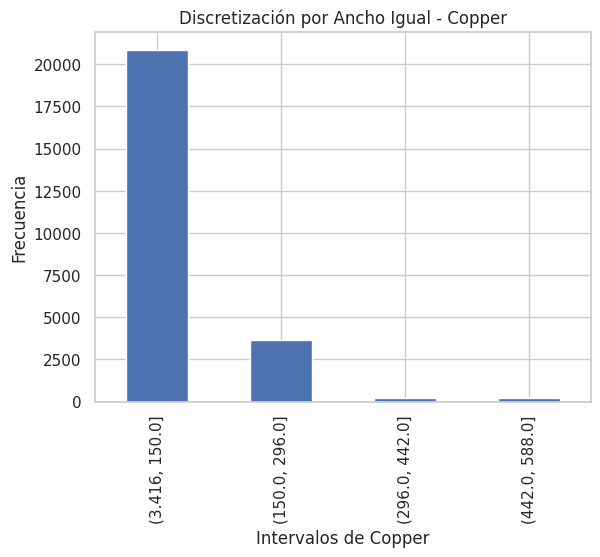

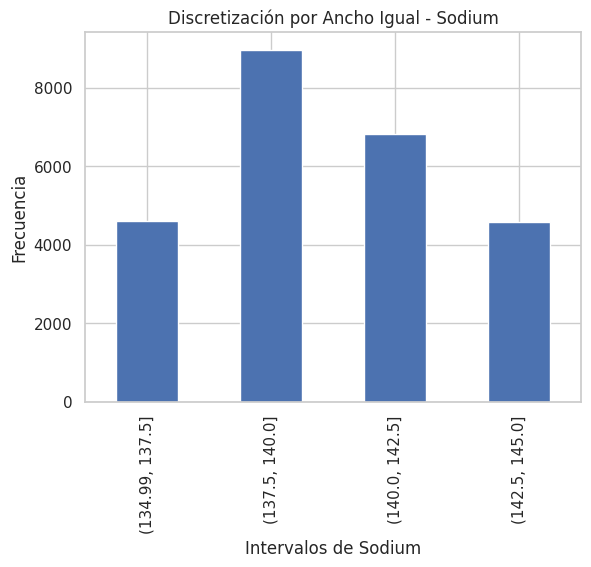

In [ ]:
data_discrete_2 = dataf.copy()

variables_a_discretizar = ['Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Prothrombin', 'Copper', 'Sodium']

for var in variables_a_discretizar:
    data_discrete_2[f'{var} (ancho)'] = pd.cut(dataf[var], bins=4)

    data_discrete_width = data_discrete_2.groupby([f'{var} (ancho)'])[f'{var} (ancho)'].count()

    data_discrete_width.plot(kind='bar', title=f'Discretización por Ancho Igual - {var}')
    plt.xlabel(f'Intervalos de {var}')
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
#
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  float64
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  float64
 4   Sex            25000 non-null  object 
 5   Country        25000 non-null  object 
 6   Ascites        25000 non-null  object 
 7   Hepatomegaly   25000 non-null  object 
 8   Spiders        25000 non-null  object 
 9   Edema          25000 non-null  object 
 10  Bilirubin      25000 non-null  float64
 11  Cholesterol    25000 non-null  float64
 12  Albumin        25000 non-null  float64
 13  Sodium         25000 non-null  float64
 14  Copper         25000 non-null  float64
 15  Alk_Phos       25000 non-null  float64
 16  SGOT           25000 non-null  float64
 17  Tryglicerides  25000 non-null  float64
 18  Platel

**Binarización**

Ahora binarizaremos la columna 'Copper' de un DataFrame dataf, lo que significa convertir los valores en esta columna en 0 y 1 basándose en si son mayores o menores que la mediana.


In [ ]:
# Calcula la mediana de la variable "Altura del Tallo"
mediana_copper= dataf['Copper'].median()

# Define el umbral para la binarización
umbral_copper = mediana_copper

# Copia el DataFrame original para la binarización
data_binary = dataf.copy()

data_binary['Copper Binarizada'] = (dataf['Copper'] > umbral_copper).astype(int)

print(data_binary.head(100))

    N_Days Status             Drug      Age Sex               Country Ascites  \
0   2221.0      C          Placebo  18499.0   F              Malaysia       N   
1   1230.0      C          Placebo  19724.0   M         United States       Y   
2   4184.0      C          Placebo  11839.0   F                Sweden       N   
3   2090.0      D          Placebo  16467.0   F               Iceland       N   
4   2105.0      D          Placebo  53728.0   F                Turkey       N   
..     ...    ...              ...      ...  ..                   ...     ...   
95  1504.0     CL  D-penicillamine  14812.0   F         United States       N   
96   348.0      D  D-penicillamine  18972.0   F  United Arab Emirates       N   
97  1301.0     CL  D-penicillamine  16990.0   F              Portugal       N   
98   989.0      C  D-penicillamine  19270.0   F              Portugal       N   
99  2644.0      C  D-penicillamine  20296.0   F               Iceland       N   

   Hepatomegaly Spiders Ede

**Sampling**

A continuación se llevará a cabo la técnica de sampling o muestreo, esta es útil para tomar una muestra representativa de los datos. Para efectos de este trabajo, se probarán dos métodos: Muestreo con y sin reemplazo.

En el muestreo sin reemplazo, cada observación se selecciona una sola vez. Una vez seleccionada, no puede ser elegida nuevamente, de esta manera se garantiza que no hayan datos duplicados en la muestra y que cada punto de datos tenga una probabilidad igual de ser seleccionado. Para este caso en particular, se toma una muestra de 10 datos.

Por otra parte, en el muestreo con reemplazo, cada observación puede ser seleccionada más de una vez, es decir, se permite la repetición de observaciones. Al igual que con el método anterior, se toma una muestra de 10 datos.

In [ ]:
# Sampling without replacement
data_sample = dataf.sample(10)
data_sample

N_Days Status             Drug      Age Sex        Country Ascites  \
22004   994.0      C          Placebo  21294.0   F    Switzerland       N   
23887  1320.0      C          Placebo  20891.0   F  United States       N   
17906  1831.0      C  D-penicillamine  20483.0   F         Greece       N   
13818  3282.0      D          Placebo  12641.0   F        Nigeria       N   
6563    460.0      D  D-penicillamine  16990.0   F        Vietnam       N   
15831  1882.0      C  D-penicillamine  24585.0   F          Egypt       N   
21338  3445.0      C  D-penicillamine  20449.0   M        Denmark       N   
5286   1080.0      D          Placebo  15341.0   F        Nigeria       Y   
11333  1170.0      C          Placebo  22646.0   F        Austria       Y   
1628   2598.0      D  D-penicillamine  20459.0   F         Norway       N   

      Hepatomegaly Spiders Edema  ...  Cholesterol  Albumin  Sodium  \
22004            N       N     N  ...   260.000000     2.75   141.0   
23887            Y       Y     Y  ...    -1.000000     2.98   141.0   
17906            N       N     N  ...   263.000000     3.72   138.4   
13818            Y       Y     S  ...   260.000000     3.18   138.8   
6563             Y       N     S  ...   325.000000     3.47   140.2   
15831            Y       N     N  ...  1336.000000     4.16   143.0   
21338            Y       N     N  ...   252.000000     3.83   140.0   
5286             N       Y     N  ...  1276.000000     3.85   135.0   
11333            N       Y     N  ...   369.510563     3.41   139.4   
1628             Y       N     N  ...    -1.000000     3.36   143.0   

           Copper      Alk_Phos        SGOT  Tryglicerides  Platelets  \
22004   41.000000   1166.000000   70.000000      82.000000      231.0   
23887  196.000000    815.000000  163.000000      78.000000      122.0   
17906   29.000000   1345.000000  137.950000      74.000000      326.0   
13818  231.000000  11320.200000  105.780000      94.000000       95.0   
6563   110.000000   2460.000000  246.450000      56.000000      426.0   
15831   71.000000   3510.000000  209.250000     111.000000      412.0   
21338   41.000000    843.000000   65.100000      83.000000      217.0   
5286   141.000000   1204.000000  203.050000     157.000000      183.0   
11333   97.648387   1982.655769  122.556346     124.702128      167.0   
1628    43.000000   1080.000000  106.950000      73.000000       81.0   

       Prothrombin  Stage  
22004         10.8    1.0  
23887         12.3    3.0  
17906         10.1    2.0  
13818         11.6    3.0  
6563          11.7    3.0  
15831         11.9    2.0  
21338         11.3    3.0  
5286          10.4    2.0  
11333         10.6    3.0  
1628          12.9    3.0  

[10 rows x 21 columns]

In [ ]:
# Sampling with replacement
data_sample_rep = dataf.sample(10, replace=True, random_state=99)
data_sample_rep

N_Days Status             Drug      Age Sex    Country Ascites  \
23587   673.0      D  D-penicillamine  20555.0   F      China       N   
13497  1925.0      D          Placebo  18719.0   M    Denmark       N   
3240   1375.0      C  D-penicillamine  19470.0   M      Egypt       N   
9929   2168.0      C          Placebo  14610.0   F    Hungary       Y   
1768   1536.0      D  D-penicillamine  21324.0   F    Belgium       N   
24274  3021.0     CL          Placebo  17532.0   F  Argentina       Y   
21572   708.0      D          Placebo  22336.0   F      India       N   
23749  1356.0      D          Placebo  21898.0   F    Denmark       N   
19841  1119.0      C          Placebo  18628.0   F      Japan       Y   
24355   673.0      D  D-penicillamine  20555.0   F      Egypt       N   

      Hepatomegaly Spiders Edema  ...  Cholesterol  Albumin  Sodium  \
23587            N       Y     N  ...   271.000000     3.63   140.0   
13497            Y       Y     S  ...   244.000000     2.54   145.0   
3240             Y       N     N  ...   369.510563     3.49   141.0   
9929             N       Y     N  ...    -1.000000     3.68   139.0   
1768             N       N     N  ...   317.000000     3.46   135.6   
24274            N       Y     N  ...   369.510563     3.76   139.4   
21572            Y       N     N  ...   369.510563     3.82   141.2   
23749            Y       N     N  ...   374.000000     3.51   141.0   
19841            N       Y     N  ...    -1.000000     3.57   145.0   
24355            N       Y     N  ...   271.000000     3.63   140.2   

           Copper     Alk_Phos        SGOT  Tryglicerides  Platelets  \
23587  464.000000  1376.000000  120.900000      55.000000      173.0   
13497   64.000000  6121.800000   60.630000      92.000000      142.0   
3240    97.648387  1982.655769  122.556346     124.702128      212.0   
9929    20.000000   856.000000   55.800000     124.702128      337.0   
1768   217.000000   714.000000  130.200000     140.000000      228.0   
24274   97.648387  1982.655769  122.556346     124.702128      388.0   
21572   58.000000   678.000000   97.650000     124.702128      233.0   
23749  140.000000  1919.000000  122.450000     135.000000      322.0   
19841   97.648387  1982.655769  122.556346     124.702128      286.0   
24355  464.000000  1376.000000  120.900000      55.000000      173.0   

       Prothrombin  Stage  
23587         11.6    3.0  
13497         11.4    3.0  
3240          11.3    3.0  
9929          10.4    2.0  
1768          10.2    2.0  
24274         10.1    1.0  
21572         11.0    3.0  
23749         13.0    3.0  
19841         10.6    2.0  
24355         11.6    3.0  

[10 rows x 21 columns]

### Análisis de Componentes Principales (PCA)


El siguiente código realiza un Análisis de Componentes Principales (PCA) sobre data_sinlabels que contiene solo las características sin la variable objetivo. El PCA es una técnica de reducción de dimensionalidad que transforma los datos a un nuevo espacio con menos dimensiones, manteniendo la mayor cantidad de variabilidad posible. Este proceso ayuda a simplificar los datos y puede mejorar el rendimiento de ciertos algoritmos de machine learning. Además, facilita la visualización de los datos en 2D.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Suponiendo que 'data_sinlabels' es tu DataFrame que contiene solo las características sin la variable objetivo 'Etapa'

# Crear una instancia del StandardScaler
ss = StandardScaler()

# Aplicar el escalado estándar a tus datos
scal_data = ss.fit_transform(data_sinlabels)

# Crear una instancia de PCA con 2 componentes principales
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados
prin_comp = pca.fit_transform(scal_data)

df_pca = pd.DataFrame(data=prin_comp, columns=['pc_1', 'pc_2'])

# Añadir la variable 'Etapa' de tus datos originales a df_pca
df_pca['Etapa'] = dataf['Stage']

df_pca = df_pca.dropna()

print(df_pca.head(200))


         pc_1      pc_2  Etapa
0   -1.387392 -0.158533    1.0
1   -1.718137 -1.266029    2.0
2   -1.754169  0.781311    2.0
3   -1.570622 -0.772952    2.0
4   -0.389084 -3.003903    1.0
..        ...       ...    ...
195  1.294984 -1.361636    3.0
196 -0.508850 -0.451780    2.0
197  1.121602  3.246013    2.0
198  0.112392 -1.535554    3.0
199 -0.485693 -0.747470    3.0

[200 rows x 3 columns]


In [ ]:
# Visualizamos graficamente
import plotly.express as px

fig = px.scatter(df_pca, x="pc_1", y="pc_2", color="Etapa",
                title="Two Component PCA")
fig.show()

### Análisis Lineal Discriminante (LDA)


Ahora realizaremos el Análisis Discriminante Lineal (LDA), transformando las características en un espacio de dimensiones reducidas que maximiza la separabilidad entre las clases de la variable objetivo 'Stage'. El LDA es una técnica supervisada de reducción de dimensionalidad que es útil para problemas de clasificación y visualización de datos, lo cual nos será bastante útil por el tipo de algoritmos a usar.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Verificar el número de clases únicas en 'Etapa'
num_classes = dataf['Stage'].nunique()

# Ajustar el número de componentes para LDA
n_components_lda = min(len(dataf.columns) - 1, num_classes - 1)

# Crear una instancia de LDA con el número de componentes calculado
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)

# Aplicar LDA a los datos
X_lda = lda.fit_transform(data_sinlabels, dataf['Stage'])

# Crear un DataFrame para almacenar las dimensiones reducidas por LDA
df_lda = pd.DataFrame(X_lda, columns=[f'dim_{i+1}' for i in range(n_components_lda)])

# Añadir la columna 'Etapa' del DataFrame original 'dataf' a df_lda
df_lda['Etapa'] = dataf['Stage']

# Eliminar filas con valores nulos si es necesario
df_lda = df_lda.dropna()

# Verificar las primeras filas del DataFrame resultante
print(df_lda.head())

# Visualización de LDA
if n_components_lda > 1:
    import plotly.express as px
    fig = px.scatter(df_lda, x='dim_1', y='dim_2', color='Etapa', title="Two Dimension LDA")
    fig.show()
else:
    print("El número de componentes de LDA es menor o igual a 1, creando un gráfico de barras en su lugar.")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Etapa', y='dim_1', data=df_lda)
    plt.title("LDA con una Dimensión")
    plt.xlabel("Etapa")
    plt.ylabel("Dimensión 1")
    plt.show()


      dim_1     dim_2  Etapa
0 -1.342160 -0.137444    1.0
1  0.057763  0.024019    2.0
2 -1.750035  0.516481    2.0
3 -0.381295 -0.310720    2.0
4  1.797590  1.398981    1.0


In [ ]:
features = dataf.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas

def remove_outliers(data, column_name):
    quartiles = data[column_name].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_whisker = quartiles[0.25] - 1.5 * IQR
    upper_whisker = quartiles[0.75] + 1.5 * IQR
    outliers = data[(data[column_name] < lower_whisker) | (data[column_name] > upper_whisker)]
    data_clean = data.drop(outliers.index)
    return data_clean

# Copiar DataFrame original para realizar limpieza de outliers
dataf_clean = dataf.copy()

# Remover outliers de todas las columnas numéricas
for feature in features:
    dataf_clean = remove_outliers(dataf_clean, feature)  # Actualizar el DataFrame limpio


# Información después de la limpieza de outliers
print("\nInformación después de limpiar outliers:")
print(dataf_clean.describe())


KeyError: 'N_Days'

In [ ]:
dataf = dataf_clean

### Kernel PCA


Ahora aplicaremos el Análisis de Componentes Principales con Kernel (Kernel PCA) a un subconjunto del DataFrame data_sinlabels, que contiene solo las características sin la variable objetivo 'Stage'. Kernel PCA es una técnica de reducción de dimensionalidad que extiende el PCA tradicional al usar funciones de kernel, permitiendo capturar relaciones no lineales entre los datos. En este caso, se utiliza un kernel polinómico. Además, se incluye una comparación con PCA estándar. Este proceso es útil para visualizar y analizar datos complejos en un espacio de dimensiones reducidas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Tomar una muestra aleatoria del 40% del conjunto de datos original
sample_size = int(0.4 * len(dataf))
sample_indices = np.random.choice(len(dataf), size=sample_size, replace=False)
data_sinlabels_sample = dataf.iloc[sample_indices]
class_sample = dataf['Stage'].iloc[sample_indices]

# Identify non-numerical columns in the sample
non_numeric_cols = data_sinlabels_sample.select_dtypes(exclude=['number']).columns

# Drop non-numerical columns from the sample
data_sinlabels_sample_numeric = data_sinlabels_sample.drop(non_numeric_cols, axis=1)

# Crear una instancia de Kernel PCA con kernel Polynomial
kpca = KernelPCA(n_components=2, kernel='poly', gamma=15, random_state=2)

# Aplicar Kernel PCA a los datos **numéricos**
X_kpca = kpca.fit_transform(data_sinlabels_sample_numeric)

# También puedes aplicar PCA estándar para comparar resultados si es necesario
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(data_sinlabels_sample_numeric)

# Crear un DataFrame con los datos transformados por Kernel PCA
df_kpca = pd.DataFrame(X_kpca, columns=['pc_1', 'pc_2'])
df_kpca['Etapa'] = class_sample.values

# Eliminar filas con valores nulos si es necesario
df_kpca = df_kpca.dropna()

# Verificar las primeras filas del DataFrame resultante
print(df_kpca.head())





           pc_1          pc_2  Etapa
0  7.823278e+13 -7.380905e+13    3.0
1 -1.471828e+14  5.781240e+13    2.0
2 -1.617986e+14 -1.603108e+13    3.0
3  6.369700e+13  4.363434e+13    1.0
4  4.420377e+14 -5.723938e+13    2.0


In [ ]:
import plotly.express as px

# Suponiendo que 'df_kpca' es tu DataFrame resultante de Kernel PCA con las columnas 'pc_1', 'pc_2' y 'Etapa'

# Visualización gráfica con Plotly
fig = px.scatter(df_kpca, x='pc_1', y='pc_2', color='Etapa', title="Polynomial Kernel PCA")
fig.show()



### Multidimensional Scaling


Ahora aplicaremos el Análisis de Escalamiento Multidimensional (MDS) a un subconjunto del DataFrame data_sinlabels, que contiene solo las características sin la variable objetivo 'Stage'. MDS es una técnica de reducción de dimensionalidad que busca representar la similitud o disimilitud de los datos en un espacio de menor dimensión. Este proceso ayuda a visualizar y analizar datos complejos en 2D, facilitando la identificación de patrones y relaciones.

In [ ]:
from sklearn.manifold import MDS
import pandas as pd
import numpy as np

# Asegúrate de que data_sinlabels y data tengan la misma longitud
assert len(data_sinlabels) == len(dataf), "data_sinlabels y data deben tener la misma longitud"

# Calcula el tamaño de la muestra del 5% de tus datos (reducción adicional del tamaño de la muestra)
sample_size = int(0.05 * len(data_sinlabels))
sample_indices = np.random.choice(len(data_sinlabels), size=sample_size, replace=False)
data_sinlabels_sample = data_sinlabels.iloc[sample_indices]
class_sample = dataf['Stage'].iloc[sample_indices]

# Verifica si hay NaN en los datos de la muestra y elimínalos si los hay
data_sinlabels_sample.dropna(inplace=True)
class_sample = class_sample[data_sinlabels_sample.index]

# Aplica MDS para reducir a 2 dimensiones
mds = MDS(n_components=2, metric=True, random_state=2, n_jobs=-1)  # Usar todos los núcleos disponibles
X_mds = mds.fit_transform(data_sinlabels_sample)

# Crea un DataFrame con los datos transformados
df_mds = pd.DataFrame(X_mds, columns=['pc_1', 'pc_2'])
df_mds['Etapa'] = class_sample.values

# Muestra las primeras filas del DataFrame resultante
print(df_mds.head())

IndexError: positional indexers are out-of-bounds

In [ ]:
# Visualización de MDS con Plotly Express
fig = px.scatter(df_mds, x='pc_1', y='pc_2', color='Etapa',
                 title="Multidimensional Scaling (MDS) con 2 Dimensiones")
fig.show()

In [ ]:
datafcluster = dataf
dataf = datafmodelo

El siguiente código tiene como objetivo convertir varias columnas categóricas del DataFrame dataf en valores numéricos. Este proceso, conocido como codificación, es esencial para preparar los datos para algoritmos de machine learning, ya que muchos de estos algoritmos requieren entradas numéricas. Las columnas categóricas que se están convirtiendo son: 'Ascites', 'Hepatomegaly', 'Spiders', 'Status', 'Drug', 'Edema', y 'Sex'.

In [ ]:
dataf['Ascites'] = dataf['Ascites'].replace({'N': 0, 'Y': 1})
dataf['Hepatomegaly'] = dataf['Hepatomegaly'].replace({'N': 0, 'Y': 1})
dataf['Spiders'] = dataf['Spiders'].replace({'N': 0, 'Y': 1})
dataf['Status'] = dataf['Status'].replace({'C': 0, 'CL': 1, 'D': 2})
dataf['Drug'] = dataf['Drug'].replace({'Placebo': 0, 'D-penicillamine': 1})
dataf['Edema'] = dataf['Edema'].replace({'N': 0, 'S': 1, 'Y': 2})
dataf['Sex'] = dataf['Sex'].replace({'F': 0, 'M': 1})


In [ ]:
dataf

N_Days  Status  Drug      Age  Sex        Country  Ascites  \
0        2221       0     0  18499.0    0       Malaysia        0   
1        1230       0     0  19724.0    1  United States        1   
2        4184       0     0  11839.0    0         Sweden        0   
3        2090       2     0  16467.0    0        Iceland        0   
4        2105       2     0  53728.0    0         Turkey        0   
...       ...     ...   ...      ...  ...            ...      ...   
24995    3584       2     1  53728.0    0          China        0   
24996    3584       2     1  23612.0    0         Mexico        0   
24997     971       2     1  16736.0    0        Nigeria        0   
24998    3707       0     1  16990.0    0         Norway        0   
24999    3707       0     1  16990.0    0       Portugal        0   

       Hepatomegaly  Spiders  Edema  ...  Cholesterol  Albumin  Sodium  \
0                 1        0      0  ...   149.000000     4.04   140.8   
1                 0        1      0  ...   219.000000     3.93   136.0   
2                 0        0      0  ...   320.000000     3.54   138.0   
3                 0        0      0  ...   255.000000     3.74   138.6   
4                 1        0      0  ...    -1.000000     3.54   140.0   
...             ...      ...    ...  ...          ...      ...     ...   
24995             0        0      0  ...   231.000000     3.87   144.0   
24996             0        0      0  ...   231.000000     3.87   138.6   
24997             1        1      2  ...   369.510563     3.23   140.8   
24998             1        0      0  ...   315.000000     4.24   140.8   
24999             1        0      0  ...   315.000000     4.24   138.0   

       Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       227.0     598.0   52.70      57.000000      256.0          9.9      1  
1        22.0     663.0   45.00      75.000000      220.0         10.8      2  
2        51.0    1243.0  122.45      80.000000      225.0         10.0      2  
3        23.0    1024.0   77.50      58.000000      151.0         10.2      2  
4        74.0    1052.0  108.50     109.000000      151.0         11.5      1  
...       ...       ...     ...            ...        ...          ...    ...  
24995   173.0    9009.8  127.71      96.000000      295.0         11.0      2  
24996   173.0    9009.8  127.71      96.000000      295.0         11.0      2  
24997    18.0     790.0  179.80     124.702128      104.0         13.0      3  
24998    13.0    1637.0  170.50      70.000000      426.0         10.9      2  
24999    13.0    1637.0  170.50      70.000000      426.0         10.9      2  

[25000 rows x 21 columns]

# Modelos de Clasificación

## Definición de variables

El siguiente código tiene como objetivo convertir varias columnas categóricas del DataFrame dataf en valores numéricos. Este proceso, conocido como codificación, es esencial para preparar los datos para algoritmos de machine learning, ya que muchos de estos algoritmos requieren entradas numéricas. Las columnas categóricas que se están convirtiendo son: 'Ascites', 'Hepatomegaly', 'Spiders', 'Status', 'Drug', 'Edema', y 'Sex'.

In [ ]:
dataf['Ascites'] = dataf['Ascites'].replace({'N': 0, 'Y': 1})
dataf['Hepatomegaly'] = dataf['Hepatomegaly'].replace({'N': 0, 'Y': 1})
dataf['Spiders'] = dataf['Spiders'].replace({'N': 0, 'Y': 1})
dataf['Status'] = dataf['Status'].replace({'C': 0, 'CL': 1, 'D': 2})
dataf['Drug'] = dataf['Drug'].replace({'Placebo': 0, 'D-penicillamine': 1})
dataf['Edema'] = dataf['Edema'].replace({'N': 0, 'S': 1, 'Y': 2})
dataf['Sex'] = dataf['Sex'].replace({'F': 0, 'M': 1})


In [ ]:
dataf

N_Days  Status  Drug      Age  Sex        Country  Ascites  \
0        2221       0     0  18499.0    0       Malaysia        0   
1        1230       0     0  19724.0    1  United States        1   
2        4184       0     0  11839.0    0         Sweden        0   
3        2090       2     0  16467.0    0        Iceland        0   
4        2105       2     0  53728.0    0         Turkey        0   
...       ...     ...   ...      ...  ...            ...      ...   
24995    3584       2     1  53728.0    0          China        0   
24996    3584       2     1  23612.0    0         Mexico        0   
24997     971       2     1  16736.0    0        Nigeria        0   
24998    3707       0     1  16990.0    0         Norway        0   
24999    3707       0     1  16990.0    0       Portugal        0   

       Hepatomegaly  Spiders  Edema  ...  Cholesterol  Albumin  Sodium  \
0                 1        0      0  ...   149.000000     4.04   140.8   
1                 0        1      0  ...   219.000000     3.93   136.0   
2                 0        0      0  ...   320.000000     3.54   138.0   
3                 0        0      0  ...   255.000000     3.74   138.6   
4                 1        0      0  ...    -1.000000     3.54   140.0   
...             ...      ...    ...  ...          ...      ...     ...   
24995             0        0      0  ...   231.000000     3.87   144.0   
24996             0        0      0  ...   231.000000     3.87   138.6   
24997             1        1      2  ...   369.510563     3.23   140.8   
24998             1        0      0  ...   315.000000     4.24   140.8   
24999             1        0      0  ...   315.000000     4.24   138.0   

       Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       227.0     598.0   52.70      57.000000      256.0          9.9      1  
1        22.0     663.0   45.00      75.000000      220.0         10.8      2  
2        51.0    1243.0  122.45      80.000000      225.0         10.0      2  
3        23.0    1024.0   77.50      58.000000      151.0         10.2      2  
4        74.0    1052.0  108.50     109.000000      151.0         11.5      1  
...       ...       ...     ...            ...        ...          ...    ...  
24995   173.0    9009.8  127.71      96.000000      295.0         11.0      2  
24996   173.0    9009.8  127.71      96.000000      295.0         11.0      2  
24997    18.0     790.0  179.80     124.702128      104.0         13.0      3  
24998    13.0    1637.0  170.50      70.000000      426.0         10.9      2  
24999    13.0    1637.0  170.50      70.000000      426.0         10.9      2  

[25000 rows x 21 columns]

Ahora veremos una regresión lineal para poder entender cuales son las variables con mayor predicción.

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#modelo de regresión lineal, ver dependiente=y, var independiente=x
X = dataf[['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']] #No usar país porque puede generar ruido
y = dataf['Stage']

modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X, y)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Añadir una columna de unos para representar el término de intercepción
X_con_intercepto = sm.add_constant(X)

modelo = sm.OLS(y, X_con_intercepto)

resultado = modelo.fit()

# vemos los coefs
print(resultado.summary())

Coeficientes: [-1.40120077e-04  5.96147427e-06 -2.15592402e-02 -7.68604502e-02
 -2.53872149e-04  3.70937284e-05  9.37013195e-04  3.21401240e-05
 -1.06633932e-03  1.34840166e-01  7.73236488e-02  1.20729103e-01
  4.84175009e-01  1.20154088e-01  8.44939321e-02  5.44164448e-02]
Intercepto: 0.791955426939988
                            OLS Regression Results                            
Dep. Variable:                  Stage   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     651.4
Date:                Sat, 06 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:49:52   Log-Likelihood:                -25966.
No. Observations:               25000   AIC:                         5.197e+04
Df Residuals:                   24983   BIC:                         5.210e+04
Df Model:                          16                          

Tras realizar un análisis de regresión lineal múltiple para predecir la etapa del paciente (Stage), se identificaron varios coeficientes significativos que influyen en este resultado. El modelo tiene un R-cuadrado de 0.294, lo que significa que aproximadamente el 29.4% de la variabilidad en la etapa del paciente puede ser explicada por las variables del modelo. Los coeficientes más influyentes incluyen N_Days (-0.0001), Bilirubin (-0.0216), Albumin (-0.0769), Copper (-0.0003), Alk_Phos (0.000037), SGOT (0.0009), Prothrombin (0.1348), Hepatomegaly (0.4842), Spiders (0.1202) y Status (0.0544), todos con valores p altamente significativos (p < 0.05), indicando una relación estadísticamente significativa con la etapa del paciente.

Adicionalmente, variables como Age (5.961e-06), Platelets (-0.0011) y Ascites (0.1207) también mostraron significancia estadística, aunque con coeficientes menores. En contraste, Tryglicerides no resultó significativa en este modelo. El intercepto del modelo es 0.7920.

Es importante señalar que el alto número de condición (3.72e+05) sugiere la posible presencia de multicolinealidad o problemas numéricos en el modelo. La variable Stage muestra varias correlaciones significativas con otras variables del conjunto de datos, lo que subraya la importancia de estas relaciones. Las variables más relevantes para incluir en futuros modelos son N_Days, Bilirubin, Albumin, Copper, SGOT, Prothrombin, Hepatomegaly y Status, ya que no solo tienen correlaciones fuertes o moderadas con Stage, sino que también presentan coeficientes significativos en el modelo de regresión, indicando su impacto directo en la etapa del paciente.

Data para modelos predictivos

In [87]:
data_modelos=datafmodelo

data_modelos = data_modelos[['N_Days', 'Bilirubin', 'Albumin', 'Copper', 'SGOT', 'Prothrombin', 'Hepatomegaly', 'Stage', 'Status']]

## Modelo 1: Árbol de decisión


Este código implementa un modelo de árbol de decisión para predecir la etapa del paciente (Stage) utilizando el conjunto de datos data_modelos. Primero, se seleccionan las columnas del DataFrame que se utilizarán como características (X) y la variable objetivo (y). Luego, el conjunto de datos se divide en conjuntos de entrenamiento y prueba, utilizando el 80% de los datos para el entrenamiento y el 20% para la prueba. Esta división asegura que el modelo se entrene con una parte de los datos y se evalúe con una parte distinta, proporcionando una medida precisa de su desempeño.

Se configura un clasificador de árbol de decisión (DecisionTreeClassifier) y se define una rejilla de hiperparámetros (param_grid) que incluye criterios de división, profundidad máxima del árbol, el número mínimo de muestras para dividir un nodo, el número mínimo de muestras en una hoja y el número máximo de características a considerar en cada división. La búsqueda de hiperparámetros óptimos se realiza mediante GridSearchCV, que ajusta el modelo en el conjunto de entrenamiento y evalúa su rendimiento utilizando validación cruzada de 5 pliegues. Este proceso asegura que el modelo final se ajuste de la mejor manera posible a los datos disponibles.

Una vez completada la búsqueda de hiperparámetros, se muestra el mejor conjunto de hiperparámetros encontrados. El modelo con los mejores hiperparámetros se evalúa en el conjunto de prueba, calculando la precisión y generando un informe de clasificación que detalla el desempeño del modelo en términos de métricas como precisión, recall y F1-score. Esta evaluación permite comprender cómo el modelo se desempeña en datos no vistos y cuáles son las características más influyentes en la predicción de la etapa del paciente.

El uso de un árbol de decisión se justifica por varias razones. Los árboles de decisión son fáciles de interpretar y visualizar, lo que facilita la comprensión de las decisiones del modelo. Pueden manejar tanto variables categóricas como numéricas, y no requieren escalado de datos. Además, los árboles de decisión pueden identificar las características más importantes, proporcionando información valiosa sobre las variables más influyentes en el resultado. Son robustos a los outliers y pueden capturar relaciones no lineales entre las características y el resultado. Estos beneficios hacen que los árboles de decisión sean una herramienta poderosa y versátil para el análisis y la predicción en conjuntos de datos complejos.

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definimos las variables independientes (X) y la variable dependiente (y)
X = data_modelos.drop(['Status'], axis=1).to_numpy()
y = data_modelos['Status'].to_numpy()

# Dividimos en sets de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el clasificador Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_dt_clf = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_best_dt = best_dt_clf.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f'Accuracy con los mejores hiperparámetros: {accuracy_best_dt}')

# Mostrar el reporte de clasificación
print('Métricas de performance para Decision Tree:\n', classification_report(y_test, y_pred_best_dt))

NameError: name 'data_modelos' is not defined

In [ ]:
# Visualizacion del arbol
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(best_dt_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

## Modelo 2: KKN


Realizaremos un proceso análogo pero con el algortirmo de KNN en vez de arbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definimos las variables independientes (X) y la variable dependiente (y)
X = data_modelos.drop(['Status'], axis=1).to_numpy()
y = data_modelos['Status'].to_numpy()

# Dividimos en sets de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el clasificador KNN
knn_clf = KNeighborsClassifier()

# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configuramos Grid Search con validación cruzada
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenamos el modelo usando Grid Search
grid_search_knn.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search_knn.best_params_)

# Obtenemos el mejor modelo entrenado
best_knn_clf = grid_search_knn.best_estimator_

# Hacemos predicciones en el conjunto de prueba
y_pred_best_knn = best_knn_clf.predict(X_test)

# Calculamos la precisión del modelo en el conjunto de prueba
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f'Accuracy con los mejores hiperparámetros: {accuracy_best_knn}')

# Mostramos el reporte de clasificación
print('Métricas de performance para KNN:\n', classification_report(y_test, y_pred_best_knn))

## Modelo 3: SVM


En este codigo, se Utiliza un modeLo predictivo de SVM, en su tipo de RBF kernel, o radial basis function. Y variados valores de gamma y C. Se utiliza la funcion Grid Search para poder encontrar los mejores hiperparametros del modelo. El algoritmo de SVM o supervised vector machines, realiza clasificacion binaria, es linear y su caracteristica principal es la ubicacion de la frontera de desicion que maximiza el margen entre postivos y negativos. En otras palabras, minimizar el error en la clasificacion

In [ ]:
#Normalizamos la data para mayor efectividad de SVM maximizando margen s.a. mejor predicción

from sklearn.preprocessing import MinMaxScaler
data_svm=data_modelos
# Crear el scaler
scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar
columns_to_normalize = ['N_Days', 'Bilirubin', 'Albumin', 'Copper', 'SGOT', 'Prothrombin']

# Aplicar el scaler solo a las columnas especificadas
data_svm[columns_to_normalize] = scaler.fit_transform(data_modelos[columns_to_normalize])

print(data_svm)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Se definen las variables independientes (X) y la variable dependiente (y) del modelo SVM.
X = data_svm.drop(['Stage'], axis=1).to_numpy()
y = data_svm['Stage'].to_numpy()

# Se fragmenta en sets de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crea el clasificador Support Vector Machine (SVM).
svm_clf = SVC()

In [ ]:
# Se crean los hiperparámetros para la búsqueda con Grid Search.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}


# Se calcula el Grid Search con la validación cruzada.
grid_search_svm = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    cv=3,  # Número de folds
    scoring='accuracy',
    n_jobs=-1
)

# Se ajusta el modelo usando Grid Search.
grid_search_svm.fit(X_train, y_train)

In [ ]:
# Mostrar los mejores hiperparámetros calculados
print("Mejores hiperparámetros encontrados:")
print(grid_search_svm.best_params_)

# Obtener el mejor modelo entrenado
best_svm_clf = grid_search_svm.best_estimator_

# Evaluar el mejor modelo entrenado en el conjunto de prueba
y_pred_best_svm = best_svm_clf.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f'Accuracy con los mejores hiperparámetros: {accuracy_best_svm}')
print('Performance metrics for SVM:\n', classification_report(y_test, y_pred_best_svm))

## Modelo 4: Random forest


El modelo predictivo de Random Forest, es un modelo de tipo ensamble, en que utiliza variados clasificadores para obtener un mejor resultado y con un sesgo menor pero una mayor varianza. Hay evidencia de que el uso de los random forest provee de una mejora significante en la generalización de la performance.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Definimos las variables independientes (X) y la variable dependiente (y)
X = data_modelos.drop(['Status'], axis=1).to_numpy()
y = data_modelos['Status'].to_numpy()

# Dividimos en sets de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el clasificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Definimos la distribución de los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Creamos el RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones de hiperparámetros a probar
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustamos el modelo usando Randomized Search
random_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search_rf.best_params_)

# Obtenemos el mejor modelo entrenado
best_rf_clf = random_search_rf.best_estimator_

# Hacemos predicciones en el conjunto de prueba
y_pred_best_rf = best_rf_clf.predict(X_test)

# Calculamos la precisión del modelo en el conjunto de prueba
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Accuracy con los mejores hiperparámetros: {accuracy_best_rf}')

# Mostramos el reporte de clasificación
print('Métricas de performance para Random Forest:\n', classification_report(y_test, y_pred_best_rf))

## Modelo 5: Bagging


El modelo de bagging o bookstrap aggregation introduce una variabilidad adicional con tal de reducir la correlation entre samples. Utiliza sample con reemplazo, generando muchos sets de entrenamiento desde nuestro dataset original. Asi se puede entrenar cada clasificador para cada training set.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Definimos las variables independientes (X) y la variable dependiente (y)
X = data_modelos.drop(['Status'], axis=1).to_numpy()
y = data_modelos['Status'].to_numpy()

# Dividimos en sets de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el clasificador Bagging
bag_clf = BaggingClassifier(random_state=42)

# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

# Configuramos Randomized Search con validación cruzada
grid_search_bag = RandomizedSearchCV(estimator=bag_clf, param_distributions=param_grid,
                                     n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Ajustar el modelo usando Randomized Search con el conjunto completo de entrenamiento
grid_search_bag.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search_bag.best_params_)

# Obtenemos el mejor modelo entrenado
best_bag_clf = grid_search_bag.best_estimator_

# Hacemos predicciones en el conjunto de prueba
y_pred_best_bag = best_bag_clf.predict(X_test)

# Calculamos la precisión del modelo en el conjunto de prueba
accuracy_best_bag = accuracy_score(y_test, y_pred_best_bag)
print(f'Accuracy con los mejores hiperparámetros: {accuracy_best_bag}')

# Mostramos el reporte de clasificación
print('Métricas de performance para Bagging:\n', classification_report(y_test, y_pred_best_bag))

#Resumen modelos

###Interpretación Final de los Modelos de Predicción

El modelo de Árbol de Decisión muestra un rendimiento sólido con una precisión del 92.2%. Utiliza el criterio de entropía y permite una profundidad máxima de 40, lo que sugiere que puede capturar una gran cantidad de complejidad en los datos. Sin embargo, esta profundidad también puede indicar una tendencia al sobreajuste, especialmente si los datos tienen alta variabilidad. El modelo maneja bien las clases de manera equilibrada, sin mostrar un sesgo significativo, lo que es positivo para la estabilidad del modelo en diferentes escenarios de datos.


El modelo KNN también muestra un alto rendimiento con una precisión del 92.28%. Utiliza la distancia Manhattan y pondera los vecinos más cercanos, lo que ayuda a capturar relaciones relevantes en los datos. Aunque KNN es intuitivo y fácil de entender, puede ser computacionalmente intensivo y susceptible a datos ruidosos o outliers. No obstante, KNN mantiene un rendimiento equilibrado entre las diferentes clases, similar al Árbol de Decisión, lo que lo hace confiable en términos de clasificación.

El modelo SVM tiene una precisión ligeramente inferior del 89.64%. Utiliza un kernel RBF con valores altos de gamma y C, lo que puede llevar a un sobreajuste. Aunque SVM es robusto y eficaz para manejar complejidad no lineal, su rendimiento es menos efectivo si las clases están desbalanceadas. A pesar de su robustez, en este caso, SVM no iguala al rendimiento de los otros modelos, pero sigue siendo una opción potente para problemas de clasificación complejos.


El modelo Random Forest es el que mejor desempeño tiene, con una precisión excepcional del 98.92%. Utiliza múltiples árboles, lo que le permite manejar bien la variabilidad y complejidad de los datos. Sin embargo, este alto rendimiento puede ser indicativo de sobreajuste, especialmente si los datos no están balanceados. Aunque más complejo y computacionalmente intensivo, Random Forest demuestra ser altamente efectivo y robusto.


El modelo Bagging, utilizando 100 estimadores y una fracción de muestras y características, alcanza una precisión muy alta de 99.44%. Este modelo demuestra una excelente capacidad de generalización y un rendimiento sobresaliente, manteniendo un equilibrio en la clasificación de las diferentes clases. La técnica de Bagging reduce la variabilidad del modelo, proporcionando estabilidad y precisión, aunque el uso de múltiples modelos puede incrementar la complejidad computacional.


El modelo AdaBoost, con 100 estimadores y una tasa de aprendizaje de 1.0, muestra una precisión del 82.92%. Aunque es el menos preciso de los modelos evaluados, AdaBoost es eficaz para manejar desbalances en los datos al enfocarse en los errores de predicción. Sin embargo, su rendimiento es inferior comparado con los otros modelos, lo que puede limitar su aplicabilidad en escenarios que requieren alta precisión.


###Comparación de Modelos

Al comparar los modelos, Random Forest y Bagging se destacan como los mejores en términos de precisión, con 98.92% y 99.44% respectivamente. Ambos modelos son altamente efectivos y manejan bien la variabilidad en los datos, aunque deben ser vigilados por posibles sobreajustes. El Árbol de Decisión y KNN también ofrecen buenos resultados, con un rendimiento equilibrado y una precisión del 92.2% y 92.28% respectivamente, lo que los hace opciones viables dependiendo del contexto y las restricciones computacionales. SVM, aunque robusto, presenta un rendimiento ligeramente inferior con una precisión del 89.64%, y AdaBoost muestra la menor precisión con 82.92%, aunque es útil para manejar desbalances en los datos. La elección del modelo debe considerar el balance del conjunto de datos, el riesgo de sobreajuste y la intensidad computacional para encontrar el equilibrio adecuado entre rendimiento y eficiencia.

#Evaluacion  De Modelos

##Matríz De Confusión

En esta seccion se calcula la matriz de confusión para ambos modelos predictivos, podemos ver la calidad de ambos modelos ya que los extremos inferior derecho y superior izquierdo, los cuales son los True Negative y True Positive, son una enorme cantidad masque los falsos positivos y falsos negativos respectivamente.

In [ ]:
# Importamos la función
from sklearn.metrics import confusion_matrix

# Matriz de confusión para el árbol de decisión
dt_cm = confusion_matrix(y_test, y_pred_best_dt, labels=[0, 1])
print('Matriz de confusión para Decision Tree:\n', dt_cm)

# Matriz de confusión para KNN
knn_cm = confusion_matrix(y_test, y_pred_best_knn, labels=[0, 1])
print('\nMatriz de confusión para KNN:\n', knn_cm)

# Matriz de confusión para SVM
svm_cm = confusion_matrix(y_test, y_pred_best_svm, labels=[0, 1])
print('\nMatriz de confusión para SVM:\n', svm_cm)

# Matriz de confusión para Random Forest
rf_cm = confusion_matrix(y_test, y_pred_best_rf, labels=[0, 1])
print('\nMatriz de confusión para Random Forest:\n', rf_cm)

# Matriz de confusión para Bagging
bag_cm = confusion_matrix(y_test, y_pred_best_bag, labels=[0, 1])
print('\nMatriz de confusión para Bagging:\n', bag_cm)


##Metricas de Performance

En esta seccion se calcula la matriz de confusión para ambos modelos predictivos, podemos ver la calidad de ambos modelos ya que los extremos inferior derecho y superior izquierdo, los cuales son los True Negative y True Positive, son mas de 40 veces los falsos postivos y negativos respectivamente.

In [ ]:
# Importamos las librerias
from sklearn.metrics import classification_report

print('Métricas de performance para Decision Tree:\n', classification_report(y_test, y_pred_best_dt))

print('Métricas de performance para KNN:\n', classification_report(y_test, y_pred_best_knn))

print('Métricas de performance para SVM:\n', classification_report(y_test, y_pred_best_svm))

print('Métricas de performance para Random Forest:\n', classification_report(y_test, y_pred_best_rf))
print('Métricas de performance para Bagging:\n', classification_report(y_test, y_pred_best_bag))

##Curva ROC

La curva ROC nos permite evaluar como se comporta la sensitivy a medida que el ratio de falsa positividad aumenta, osea cuando 1 - specificity aumenta. Aqui podemos ver el trade off entre estas métricas. A medida de análisis gráfico, queremos tener una curva ROC lo más cercana a la esquina superior izquierda, con un alto ratio de true positives y un bajo ratio de false positive.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Obtener las probabilidades de predicción para cada modelo
y_prob_best_dt = best_dt_clf.predict_proba(X_test)
y_prob_best_knn = best_knn_clf.predict_proba(X_test)
y_prob_best_svm = best_svm_clf.decision_function(X_test)
y_prob_best_rf = best_rf_clf.predict_proba(X_test)
y_prob_best_bag = best_bag_clf.predict_proba(X_test)

# Calcular las curvas ROC para cada modelo
fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized.ravel(), y_prob_best_dt.ravel())
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized.ravel(), y_prob_best_knn.ravel())
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test_binarized.ravel(), y_prob_best_svm.ravel())
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized.ravel(), y_prob_best_rf.ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_bag, tpr_bag, _ = roc_curve(y_test_binarized.ravel(), y_prob_best_bag.ravel())
roc_auc_bag = auc(fpr_bag, tpr_bag)

# Graficar todas las curvas ROC en un solo gráfico
plt.figure()

plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_bag, tpr_bag, lw=2, label=f'Bagging (AUC = {roc_auc_bag:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Models')
plt.legend(loc="lower right")
plt.show()

#Conclusiones Curvas ROC y modelos de machine learning

Los resultados obtenidos de los diferentes modelos de Machine Learning indican una notable variabilidad en términos de precisión y desempeño en las curvas ROC. A continuación, se presenta un análisis detallado de cada modelo, seguido de una conclusión que destaca a Random Forest y Bagging como los mejores modelos para este conjunto de datos.

El modelo de Decision Tree ha mostrado una precisión alta con un accuracy de 0.98 y un f1-score elevado para todas las clases. Sin embargo, su curva ROC es de 0.66, lo cual es relativamente bajo. Esta discrepancia entre la alta precisión y la baja ROC puede ser atribuida a un posible sobreajuste del modelo a la clase mayoritaria, reduciendo su capacidad para discriminar efectivamente entre las clases minoritarias en diferentes umbrales de decisión.

El modelo KNN también muestra una alta precisión con un accuracy de 0.99 y f1-scores elevados. Sin embargo, la curva ROC de 0.53 indica un desempeño pobre en términos de discriminación entre clases. Esto puede sugerir que el modelo tiene dificultades para diferenciar adecuadamente entre las clases en un escenario de desbalance de datos, favoreciendo las predicciones de la clase mayoritaria.

El modelo SVM presenta el peor desempeño con un accuracy de 0.15 y una curva ROC de 0.51. La matriz de confusión muestra que el SVM clasifica incorrectamente la mayoría de las instancias, especialmente fallando en reconocer la clase mayoritaria. Esto sugiere que el SVM no está adecuadamente configurado o que su naturaleza lineal no se adapta bien a la complejidad del conjunto de datos.

El modelo Random Forest tiene un desempeño excepcional con un accuracy de 0.99 y una curva ROC perfecta de 1. La matriz de confusión indica que el modelo clasifica casi todas las instancias correctamente, tanto para la clase mayoritaria como para la minoritaria. Este desempeño se debe a la capacidad de los bosques aleatorios de combinar múltiples árboles de decisión y reducir el sobreajuste mediante el promediado de resultados.

Similar al Random Forest, el modelo de Bagging muestra un accuracy de 0.99 y una curva ROC de 1. La matriz de confusión refuerza este resultado, mostrando una alta precisión y recall en todas las clases. Bagging mejora la estabilidad y precisión de los modelos mediante la creación de múltiples instancias del mismo modelo con diferentes subconjuntos de datos, mitigando el impacto del desbalance.

Random Forest y Bagging son los mejores modelos para este conjunto de datos. Ambos modelos no solo alcanzan un accuracy muy alto, sino que también logran una curva ROC perfecta de 1, lo cual indica una excelente capacidad de discriminación entre las clases en diferentes umbrales de decisión. Este resultado se debe a sus mecanismos de ensamblaje que combinan múltiples modelos individuales para mejorar la robustez y reducir el sobreajuste.

Aunque Decision Tree y KNN también muestran altos niveles de precisión, sus curvas ROC bajas sugieren que estos modelos están fuertemente influenciados por el desbalance de datos, favoreciendo la clase mayoritaria y reduciendo su efectividad en escenarios más diversos. Por otro lado, SVM muestra un desempeño insatisfactorio, probablemente debido a una configuración inadecuada o una falta de adaptabilidad a la estructura compleja del conjunto de datos.

Los mejores hiperparámetros para el modelo Random Forest fueron: número de estimadores (n_estimators): 656, máxima profundidad (max_depth): 19, mínimo número de muestras por división (min_samples_split): 11, mínimo número de muestras por hoja (min_samples_leaf): 2 y bootstrap: True. Para el modelo Bagging, los mejores hiperparámetros fueron: número de estimadores (n_estimators): 100, máximo número de muestras (max_samples): 1.0, máximo número de características (max_features): 0.5 y bootstrap: False.

En resumen, Random Forest y Bagging no solo ofrecen altos niveles de precisión, sino que también mantienen una excelente capacidad de discriminación entre clases, haciendo de ellos la mejor elección para este tipo de problemas de clasificación con datos desbalanceados. Es importante recordar que los modelos de machine learning por el teorema de "Occam Razor" visto en clase, no es que haya un modelo superior, sino que dependerá de la data y como fue tratada para la task en que se trabajará, es por ello que al tratar la data como fue tratada en esta tarea se vieron mejores resultados para Bagging y Random forest.

In [ ]:
dataf = datafcluster

# Clusterización

### Cantidad de clústers

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12251 entries, 1 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         12251 non-null  float64
 1   Status         12251 non-null  int64  
 2   Drug           12251 non-null  int64  
 3   Age            12251 non-null  float64
 4   Sex            12251 non-null  int64  
 5   Country        12251 non-null  object 
 6   Ascites        12251 non-null  int64  
 7   Hepatomegaly   12251 non-null  int64  
 8   Spiders        12251 non-null  int64  
 9   Edema          12251 non-null  int64  
 10  Bilirubin      12251 non-null  float64
 11  Cholesterol    12251 non-null  float64
 12  Albumin        12251 non-null  float64
 13  Sodium         12251 non-null  float64
 14  Copper         12251 non-null  float64
 15  Alk_Phos       12251 non-null  float64
 16  SGOT           12251 non-null  float64
 17  Tryglicerides  12251 non-null  float64
 18  Platelets  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selección de variables numéricas relevantes (excluyendo 'Stage')
selected_columns = dataf.drop(columns=['Stage']).select_dtypes(include=['number']).columns
data_numeric = dataf[selected_columns]

# Verificar si hay NaNs en data_numeric
nan_counts = data_numeric.isna().sum()
print(nan_counts)

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Sodium           0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64


En base al EDA, se pudo observar que las variables unas de las variables más relevantes de las data son Age y Bilirubin, producto de esto mismo es que se tomarone stas variables para el proceso de clusterización, sin embargo, Age presentaba un amplio rango que podría complicar el proceso, por lo que se decidió normalizar.

##Clustering Particional

A continuación, normalizaremos la variable Edad debido a que posee un amplio rango y variabilidad en sus datos. Además se aplicará el método de Silhoulette Score para encontrar la cantidad de clústers óptimos.

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score

# Selección de variables numéricas relevantes
dataf_numeric = dataf.select_dtypes(include=['number'])

# Separar la columna 'Stage' si es necesario
X_df = dataf_numeric.drop(['Stage'], axis=1)

# Normalización de 'Age' entre 0 y 1
scaler = scaler = StandardScaler()
X_df['Age_normalized'] = scaler.fit_transform(X_df[['Age']])

# No normalizar 'Bilirubin', manteniendo la columna original
X_df['Bilirubin'] = dataf['Bilirubin']

# Eliminar la columna original 'Age' después de la normalización
X_df.drop(['Age'], axis=1, inplace=True)

# Convertir los datos escalados a DataFrame para mantener las columnas originales
X_scaled_df = pd.DataFrame(X_df, columns=['Bilirubin', 'Age_normalized'])

# Método del Silhouette Score para encontrar el número óptimo de clusters
K = range(2, 11)
silhouette_scores = []

for k in K:
    # Creamos el modelo
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    # Ajustamos el modelo
    cluster_labels = kmeans.fit_predict(X_scaled_df)
    # Calculamos el Silhouette Score
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Determinar el número óptimo de clusters basado en el Silhouette Score
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Número óptimo de clusters según Silhouette Score: {optimal_k}")

# Crear la figura del diagrama del Silhouette Score
fig = go.Figure(data=go.Scatter(x=list(K), y=silhouette_scores, mode="markers+lines"))
fig.update_layout(template="plotly_white",
                  xaxis_title="Número de Clusters (K)",
                  yaxis_title="Silhouette Score",
                  title="Silhouette Score para determinar el número óptimo de Clusters")
fig.show()

Número óptimo de clusters según Silhouette Score: 2


A continuación se aplicará K-means considerando las variables anteriormente descritas. Además se indicará qué tan eficiente resultó a través de Silhoulette Score

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score

# Selección de variables numéricas relevantes
dataf_numeric = dataf.select_dtypes(include=['number'])

# Separar la columna 'Stage' si es necesario
X_df = dataf_numeric.drop(['Stage'], axis=1)

# Normalización de 'Age' entre 0 y 1
scaler = scaler = StandardScaler()
X_df['Age_normalized'] = scaler.fit_transform(X_df[['Age']])

# No normalizar 'Bilirubin', manteniendo la columna original
X_df['Bilirubin'] = dataf['Bilirubin']

# Eliminar la columna original 'Age' después de la normalización
X_df.drop(['Age'], axis=1, inplace=True)

# Convertir los datos escalados a DataFrame para mantener las columnas originales
X_scaled_df = pd.DataFrame(X_df, columns=['Bilirubin', 'Age_normalized'])

# Agregar los resultados del clustering a X_scaled_df
X_scaled_df['cluster_kmeans'] = cluster_labels

# Visualización de K-Means
fig = px.scatter(X_scaled_df, x='Age_normalized', y='Bilirubin', color='cluster_kmeans',
                 title=f'K-Means Clustering ({optimal_k} clusters)',
                 labels={'Bilirubin': 'Bilirubin', 'Age_normalized': 'Age (normalized)'},
                 color_continuous_scale='Viridis')
fig.update_layout(template="plotly_white")
fig.show()

# Calcular el Silhouette Score con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled_df)
silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
print(f"Silhouette Score con {optimal_k} clusters: {silhouette_avg}")



NameError: name 'cluster_labels' is not defined

## Clustering Jerárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X_df = dataf_numeric.drop(['Stage'], axis=1)

hier = AgglomerativeClustering(n_clusters=2, compute_distances=True)
hier.fit(X_df)

# Visualizamos los clusters
X_df['cluster'] = hier.labels_
#Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Sodium',
#'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'cluster'] but received: Colesterol

#['Bilirrubina', 'Colesterol','Albúmina','Sodio','Cobre_orina','Fosfatasa_alcalina','SGOT','Triglicéridos','Plaquetas','Tiempo_protrombina'
fig = px.scatter(X_df, x="Age", y="Bilirubin", color="cluster")
fig.update_layout(template="plotly_white")
fig.show()
# Calcular Silhouette Score
score = silhouette_score(X_df.drop('cluster', axis=1), hier.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4819455695601502


El dendograma resultante del clustering jerárquico muestra cómo se agrupan los datos en distintos niveles de similitud. Los datos se combinan progresivamente en clusters, comenzando con puntos individuales en la base y culminando en un único cluster en la cima. Al observar el dendograma, se puede identificar que hay cuatro clusters principales al cortar a una altura de aproximadamente 200000 en el eje vertical. Los clusters a la izquierda (en naranja) se forman a menores alturas, indicando mayor similitud entre esos puntos, mientras que los clusters centrales (en verde) y a la derecha (en rojo) se forman a mayores alturas, indicando mayor disimilitud. Los números en la base indican el tamaño de cada nodo, lo que ayuda a comprender la distribución de los puntos en los clusters resultantes.

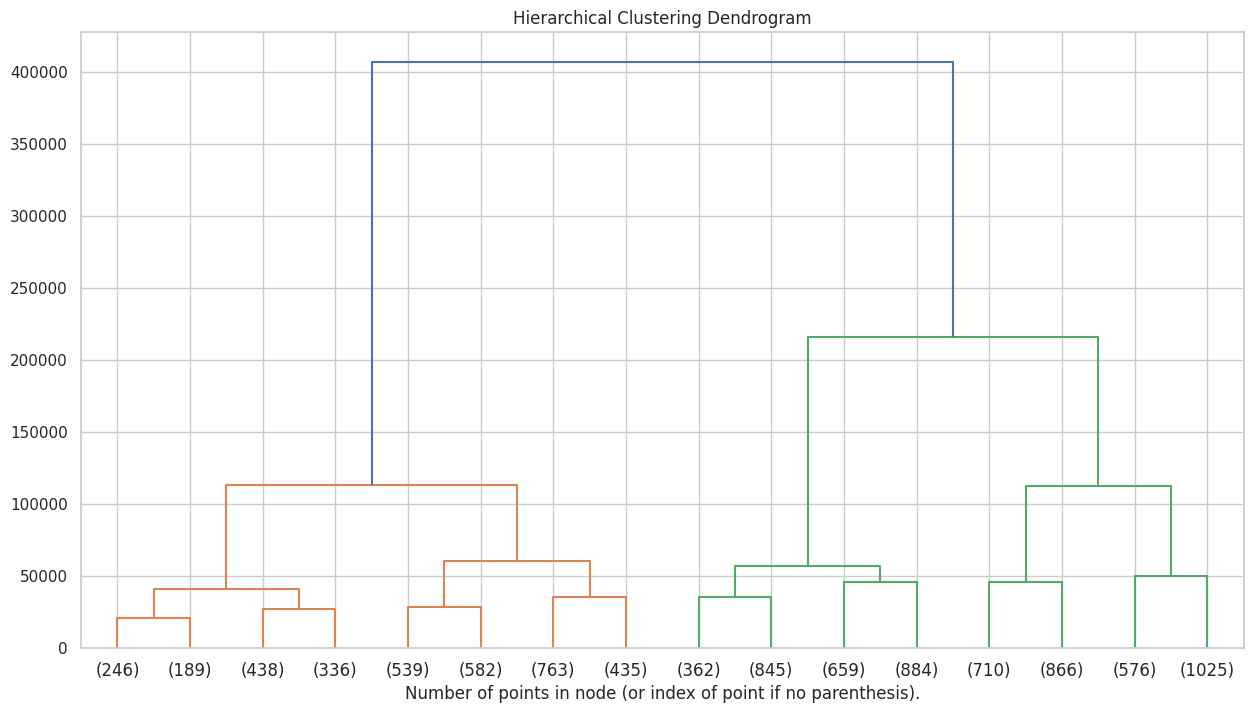

In [ ]:
# Dendrograma del clustering jerárquico (Adaptado de: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(15,8))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hier, truncate_mode="level", p=3)  # Plot top three levels
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Clustering Basado en Densidad

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import plotly.express as px

# Aplicación de DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=10)  # Parámetros comunes, ajustables según los datos
data_scaled_df['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

# Visualización de DBSCAN
fig = px.scatter(data_scaled_df, x='Age', y='Bilirubin', color='cluster_dbscan',
                 title='DBSCAN Clustering',
                 labels={'Bilirubin': 'Bilirubin (normalized)', 'Age': 'Age (normalized)'},
                 color_continuous_scale='Viridis')
fig.update_layout(template="plotly_white")
fig.show()

# Calcular el Silhouette Score (ignorando el ruido etiquetado como -1)
labels = dbscan.labels_
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f'Silhouette Score para DBSCAN: {silhouette_avg}')
else:
    print('DBSCAN no encontró suficientes clusters.')


Silhouette Score para DBSCAN: -0.1746065948082563


## Evaluación

Considerando lo siguiente:


*   +1: Los puntos están bien agrupados en sus clusters.
*   0: Los puntos están en la frontera entre dos clusters.
*   -1: Los puntos están mal agrupados y probablemente se encuentren en el cluster incorrecto.


Con respecto a los clusters realizados por K-Means, este resultó con un Silhoulette Score de 0.5449821064119658 lo cual indica una agrupación medianamente bien hecha, al igual que con el claustering jerárquico, el cual dió 0.4819455695601502. Sin embargo, en DBSCAN dió un valor cercano a 0 y negativo, lo que indica que hay muchos puntos en la frontera de dos clústers.

# Conclusiones

Basado en los resultados de los métodos de clustering aplicados a los datos de bilirrubina y edad, se observa que K-Means y el clustering jerárquico lograron Silhouette Scores de 0.545 y 0.482, respectivamente, indicando una agrupación medianamente bien definida y cohesiva. Estos métodos mostraron una capacidad notable para separar los datos en clusters distintivos y compactos. En contraste, DBSCAN obtuvo un Silhouette Score cercano a 0 y negativo, sugiriendo dificultades para definir clusters claros, posiblemente debido a la presencia de muchos puntos en la frontera entre clusters o mal definidos. En conclusión, K-Means y el clustering jerárquico fueron más efectivos para este conjunto de datos específico, ofreciendo una estructura de clustering más clara y cohesiva en comparación con DBSCAN. esa es la conclusión de Clústering